In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random as rd

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.cluster import KMeans
from sklearn.cluster import BisectingKMeans
from sklearn.model_selection import cross_val_score

from sklearn.utils import resample
plt.style.use('ggplot')

In [24]:
file_path = '../Final_Data_Set/Original Dataset with Outliers Included.csv'
df = pd.read_csv(file_path)
df.head(5)

age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   diabetes  smoking_history_encoded  gender_encoded  
0         0                -0.246527       -0.119227  
1         0                -0.246527       -0.119227  
2         0                -0.246527        0.150651  
3         0                 0.450465       -0.119227  
4         0                 0.450465        0.150651

<h1>SMOTE Oversampling</h1>

In [25]:
is_diabetic = df["diabetes"].value_counts()
print("Yes: ",is_diabetic[1])
print("No: ",is_diabetic[0])

Yes:  8500
No:  91482


In [26]:
#Copy of df before doing SMOTE oversampling
new_df = df.copy()

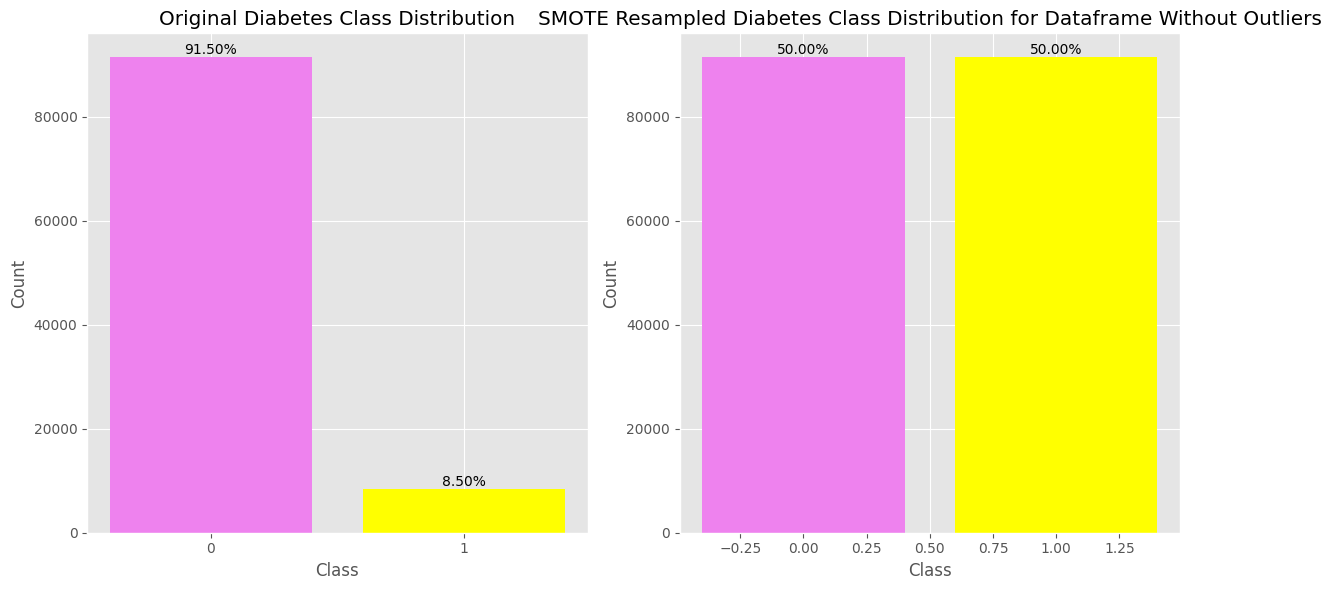

In [27]:
from imblearn.over_sampling import SMOTE

# Separate features (X) and target variable (y)
X = new_df.drop("diabetes", axis=1)
y = new_df["diabetes"]

# Initialize SMOTE

smote = SMOTE(random_state=424)

# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Count the occurrences of each class in the original dataset
original_class_counts = new_df["diabetes"].value_counts()

# Calculate the percentage of each class
original_percentages = original_class_counts / len(new_df) * 100

# Count the occurrences of each class in the resampled dataset
resampled_class_counts = pd.Series(y_resampled).value_counts()

# Calculate the percentage of each class
resampled_percentages = resampled_class_counts / len(y_resampled) * 100

# Plotting
plt.figure(figsize=(12, 6))

# Bar chart for original and SMOTE resampled class distribution
plt.subplot(1, 2, 1)
bars_1 = plt.bar(original_class_counts.index, original_class_counts.values, color=['violet', 'yellow'])
for bar, label in zip(bars_1, original_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Original Diabetes Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(original_class_counts.index, ['0', '1'])

plt.subplot(1, 2, 2)
bars_2 = plt.bar(resampled_class_counts.index, resampled_class_counts.values, color=['violet', 'yellow'])
for bar, label in zip(bars_2, resampled_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('SMOTE Resampled Diabetes Class Distribution for Dataframe Without Outliers')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [28]:
# Create a DataFrame from the SMOTE resampled data
df_resampled = pd.DataFrame(data=X_resampled, columns=X.columns)
df_resampled["diabetes"] = y_resampled

df_resampled_bisect = df_resampled.copy()
df_resampled_imp = df_resampled.copy()

<h1>KMeans Clustering<h1>

In [29]:
X = df_resampled.iloc[:, 0:8]
y = df_resampled.iloc[:, -1]

In [30]:
# Fit KMeans model
model=KMeans(n_clusters=2, n_init=10, random_state=424)
model.fit(X)

labels=model.labels_ + 1
labels  #clustering into 2 groups: 0 and 1

centers=model.cluster_centers_
centers

model.inertia_

X['clusters']=labels
X

age  hypertension  heart_disease        bmi  HbA1c_level  \
0       80.0             0              1  25.190000     6.600000   
1       54.0             0              0  27.320000     6.600000   
2       28.0             0              0  27.320000     5.700000   
3       36.0             0              0  23.450000     5.000000   
4       76.0             1              1  20.140000     4.800000   
...      ...           ...            ...        ...          ...   
182959  72.0             0              0  27.992175     6.760849   
182960  80.0             1              0  35.628573     6.100000   
182961  67.0             0              0  29.786139     6.134009   
182962  54.0             0              0  28.054402     5.800000   
182963  61.0             1              0  37.605755     8.527164   

        blood_glucose_level  smoking_history_encoded  gender_encoded  clusters  
0                       140                -0.246527       -0.119227         2  
1                        80                -0.246527       -0.119227         2  
2                       158                -0.246527        0.150651         2  
3                       155                 0.450465       -0.119227         2  
4                       155                 0.450465        0.150651         2  
...                     ...                      ...             ...       ...  
182959                  160                -0.246527        0.150651         2  
182960                  260                 0.195045       -0.119227         1  
182961                  159                -0.154536       -0.083607         2  
182962                  145                 0.255308        0.075086         2  
182963                  200                 0.230756        0.065579         1  

[182964 rows x 9 columns]

<h1>Elbow Plot of KMeans Clustering<h1>

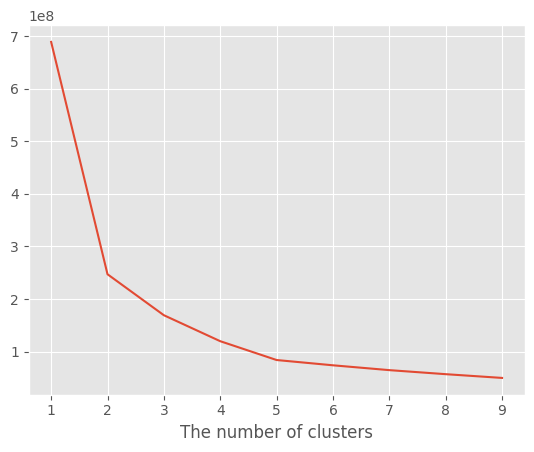

In [31]:
inertia_train={}
for n_cluster in range(1,10):
    model=KMeans(n_clusters=n_cluster, n_init=10)
    model.fit(X)
    inertia_train[n_cluster]=model.inertia_
    
plt.plot(range(1,10),inertia_train.values())
plt.xlabel('The number of clusters') #inertia is the measure of each dots to its centers: tight clusters, low inertia
plt.show()

In [32]:
# Assign the 'clusters' column to the original DataFrame
df_resampled['clusters'] = X['clusters']

# Display the DataFrame with added 'clusters' column
df_resampled

age  hypertension  heart_disease        bmi  HbA1c_level  \
0       80.0             0              1  25.190000     6.600000   
1       54.0             0              0  27.320000     6.600000   
2       28.0             0              0  27.320000     5.700000   
3       36.0             0              0  23.450000     5.000000   
4       76.0             1              1  20.140000     4.800000   
...      ...           ...            ...        ...          ...   
182959  72.0             0              0  27.992175     6.760849   
182960  80.0             1              0  35.628573     6.100000   
182961  67.0             0              0  29.786139     6.134009   
182962  54.0             0              0  28.054402     5.800000   
182963  61.0             1              0  37.605755     8.527164   

        blood_glucose_level  smoking_history_encoded  gender_encoded  \
0                       140                -0.246527       -0.119227   
1                        80                -0.246527       -0.119227   
2                       158                -0.246527        0.150651   
3                       155                 0.450465       -0.119227   
4                       155                 0.450465        0.150651   
...                     ...                      ...             ...   
182959                  160                -0.246527        0.150651   
182960                  260                 0.195045       -0.119227   
182961                  159                -0.154536       -0.083607   
182962                  145                 0.255308        0.075086   
182963                  200                 0.230756        0.065579   

        diabetes  clusters  
0              0         2  
1              0         2  
2              0         2  
3              0         2  
4              0         2  
...          ...       ...  
182959         1         2  
182960         1         1  
182961         1         2  
182962         1         2  
182963         1         1  

[182964 rows x 10 columns]

In [33]:
# Iterate over unique cluster values
for cluster_value in df_resampled['clusters'].unique():
    # Create a DataFrame for the current cluster
    cluster_idx = df_resampled[df_resampled['clusters'] == cluster_value].copy()
    
    # Create a variable for the current DataFrame
    globals()[f'cluster_{cluster_value}'] = cluster_idx

In [34]:
cluster_2

age  hypertension  heart_disease        bmi  HbA1c_level  \
0       80.000000             0              1  25.190000     6.600000   
1       54.000000             0              0  27.320000     6.600000   
2       28.000000             0              0  27.320000     5.700000   
3       36.000000             0              0  23.450000     5.000000   
4       76.000000             1              1  20.140000     4.800000   
...           ...           ...            ...        ...          ...   
182956  39.756151             0              0  37.200158     6.697539   
182957  64.001688             0              0  28.937266     6.200506   
182959  72.000000             0              0  27.992175     6.760849   
182961  67.000000             0              0  29.786139     6.134009   
182962  54.000000             0              0  28.054402     5.800000   

        blood_glucose_level  smoking_history_encoded  gender_encoded  \
0                       140                -0.246527       -0.119227   
1                        80                -0.246527       -0.119227   
2                       158                -0.246527        0.150651   
3                       155                 0.450465       -0.119227   
4                       155                 0.450465        0.150651   
...                     ...                      ...             ...   
182956                  155                 0.280504       -0.119227   
182957                  140                 0.449289       -0.118771   
182959                  160                -0.246527        0.150651   
182961                  159                -0.154536       -0.083607   
182962                  145                 0.255308        0.075086   

        diabetes  clusters  
0              0         2  
1              0         2  
2              0         2  
3              0         2  
4              0         2  
...          ...       ...  
182956         1         2  
182957         1         2  
182959         1         2  
182961         1         2  
182962         1         2  

[133772 rows x 10 columns]

In [35]:
X_cluster_1 = cluster_1.drop('diabetes', axis=1)  # Features
X_cluster_1 = X_cluster_1.drop('clusters', axis = 1)
y_cluster_1 = cluster_1['diabetes']  # Target variable


# Split the data into training and test sets
X_train_cluster_1, X_test_cluster_1, y_train_cluster_1, y_test_cluster_1 = train_test_split(X_cluster_1, y_cluster_1, test_size=0.3, random_state=424)

# Initialize the logistic regression model
logreg_1 = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_1.fit(X_train_cluster_1, y_train_cluster_1)

# Make predictions on the test data
predictions_1 = logreg_1.predict(X_test_cluster_1)

# Evaluate the model
accuracy = accuracy_score(y_test_cluster_1, predictions_1)
classification_rep = classification_report(y_test_cluster_1, predictions_1)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9577856078059358
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      2036
           1       0.97      0.98      0.98     12722

    accuracy                           0.96     14758
   macro avg       0.92      0.90      0.91     14758
weighted avg       0.96      0.96      0.96     14758



c:\Users\joyce\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
X_cluster_2 = cluster_2.drop('diabetes', axis=1)  # Features
X_cluster_2 = X_cluster_2.drop('clusters', axis = 1)
y_cluster_2 = cluster_2['diabetes']  # Target variable


# Split the data into training and test sets
X_train_cluster_2, X_test_cluster_2, y_train_cluster_2, y_test_cluster_2 = train_test_split(X_cluster_2, y_cluster_2, test_size=0.4, random_state=424)

# Initialize the logistic regression model
logreg_2 = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_2.fit(X_train_cluster_2, y_train_cluster_2)

# Make predictions on the test data
predictions_2 = logreg_2.predict(X_test_cluster_2)

# Evaluate the model
accuracy = accuracy_score(y_test_cluster_2, predictions_2)
classification_rep = classification_report(y_test_cluster_2, predictions_2)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.865536638696294
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     33895
           1       0.82      0.82      0.82     19614

    accuracy                           0.87     53509
   macro avg       0.86      0.86      0.86     53509
weighted avg       0.87      0.87      0.87     53509



c:\Users\joyce\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

# Combine features and labels from all clusters
X_combined = np.concatenate((X_cluster_1, X_cluster_2), axis=0)
y_combined = np.concatenate((y_cluster_1, y_cluster_2), axis=0)

# Split the combined data into training and test sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y_combined, test_size=0.3, random_state=424)

# Create a list of tuples where each tuple is (model_name, model_instance)
model_tuple_list = [ ('cluster_1', logreg_1),('cluster_2', logreg_2)]

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=model_tuple_list, voting='hard')

# Fit the VotingClassifier on the combined training set
voting_clf.fit(X_train_combined, y_train_combined)

# Make predictions using the ensemble model on the combined test set
ensemble_predictions = voting_clf.predict(X_test_combined)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(y_test_combined, ensemble_predictions)
# Calculate precision
precision_ensemble = precision_score(y_test_combined, ensemble_predictions, average='weighted')
# Calculate recall
recall_ensemble = recall_score(y_test_combined, ensemble_predictions, average='weighted')
# Calculate F1-score
f1_ensemble = f1_score(y_test_combined, ensemble_predictions, average='weighted')
# Calculate the AUC score

auc_ensemble = roc_auc_score(y_test_combined, ensemble_predictions)


classification_report_ensemble = classification_report(y_test_combined, ensemble_predictions)

print(f"Ensemble Model Accuracy: {accuracy_ensemble}")
print(f"Ensemble Model Precision: {precision_ensemble}")
print(f"Ensemble Model Recall: {recall_ensemble}")
print(f"Ensemble Model f1: {f1_ensemble}")
print(f"Ensemble Model AUC ROC: {auc_ensemble}")
print("Ensemble Model Classification Report:")
print(classification_report_ensemble)

c:\Users\joyce\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\joyce\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Ensemble Model Accuracy: 0.8848970668609947
Ensemble Model Precision: 0.8848971052751419
Ensemble Model Recall: 0.8848970668609947
Ensemble Model f1: 0.8848970848932464
Ensemble Model AUC ROC: 0.8848950608269738
Ensemble Model Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     27326
           1       0.89      0.89      0.89     27564

    accuracy                           0.88     54890
   macro avg       0.88      0.88      0.88     54890
weighted avg       0.88      0.88      0.88     54890



<h1>Random Forests model on clusters<h1>

In [38]:
# Create and train the first Random Forest model
rf_model1 = RandomForestClassifier(n_estimators=100, random_state=424)
rf_model1.fit(X_train_cluster_1, y_train_cluster_1)


# Make predictions using the first Random Forest model
y_pred_rf1 = rf_model1.predict(X_test_cluster_1)


# Calculate accuracy for the first Random Forest model
accuracy_rf1 = accuracy_score(y_test_cluster_1, y_pred_rf1)
print("Random Forest Model 1 Accuracy:", accuracy_rf1)

classification_rep = classification_report(y_test_cluster_1, y_pred_rf1)

print("Classification Report:")
print(classification_rep)

# Perform cross-validation
cv_scores = cross_val_score(rf_model1, X_train_cluster_1, y_train_cluster_1, cv=5, scoring='accuracy')
print("Cross-validated Accuracy Scores:", cv_scores)
print("Mean Cross-validated Accuracy:", cv_scores.mean())





Random Forest Model 1 Accuracy: 0.9908524190269684
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2036
           1       1.00      0.99      0.99     12722

    accuracy                           0.99     14758
   macro avg       0.98      0.98      0.98     14758
weighted avg       0.99      0.99      0.99     14758

Cross-validated Accuracy Scores: [0.98780311 0.9863511  0.9869319  0.98896472 0.98838222]
Mean Cross-validated Accuracy: 0.987686609038037


In [39]:
# Create and train the first Random Forest model
rf_model2 = RandomForestClassifier(n_estimators=100, random_state=424)
rf_model2.fit(X_train_cluster_2, y_train_cluster_2)


# Make predictions using the first Random Forest model
y_pred_rf2 = rf_model2.predict(X_test_cluster_2)


# Calculate accuracy for the first Random Forest model
accuracy_rf2 = accuracy_score(y_test_cluster_2, y_pred_rf2)
print("Random Forest Model 1 Accuracy:", accuracy_rf2)

classification_rep = classification_report(y_test_cluster_2, y_pred_rf2)

print("Classification Report:")
print(classification_rep)

# Perform cross-validation
cv_scores = cross_val_score(rf_model2, X_train_cluster_2, y_train_cluster_2, cv=5, scoring='accuracy')
print("Cross-validated Accuracy Scores:", cv_scores)
print("Mean Cross-validated Accuracy:", cv_scores.mean())




Random Forest Model 1 Accuracy: 0.9729391317348484
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     33895
           1       0.97      0.95      0.96     19614

    accuracy                           0.97     53509
   macro avg       0.97      0.97      0.97     53509
weighted avg       0.97      0.97      0.97     53509

Cross-validated Accuracy Scores: [0.97271538 0.97358749 0.96928923 0.97115624 0.97121854]
Mean Cross-validated Accuracy: 0.9715933766247051


In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Combine features and labels from all clusters
X_combined_rf = np.concatenate((X_cluster_1, X_cluster_2), axis=0)
y_combined_rf = np.concatenate((y_cluster_1, y_cluster_2), axis=0)

# Split the combined_rf data into training and test sets
X_train_combined_rf, X_test_combined_rf, y_train_combined_rf, y_test_combined_rf = train_test_split(X_combined_rf, y_combined_rf, test_size=0.3, random_state=424)

# Create a list of tuples where each tuple is (model_name, model_instance)
model_tuple_list = [('cluster_1', rf_model1), ('cluster_2', rf_model2)]
# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=model_tuple_list, voting='hard')

# Fit the VotingClassifier on the combined_rf training set
voting_clf.fit(X_train_combined_rf, y_train_combined_rf)

# Make predictions using the ensemble model on the combined_rf test set
ensemble_predictions = voting_clf.predict(X_test_combined_rf)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(y_test_combined_rf, ensemble_predictions)


# Calculate precision
precision_ensemble = precision_score(y_test_combined_rf, ensemble_predictions, average='weighted')

# Calculate recall
recall_ensemble = recall_score(y_test_combined_rf, ensemble_predictions, average='weighted')

# Calculate F1-score
f1_ensemble = f1_score(y_test_combined_rf, ensemble_predictions, average='weighted')


classification_report_ensemble = classification_report(y_test_combined_rf, ensemble_predictions)


print(f"Ensemble Model Accuracy: {accuracy_ensemble}")
print(f"Ensemble Model Precision: {precision_ensemble}")
print(f"Ensemble Model Recall: {recall_ensemble}")
print(f"Ensemble Model F1-score: {f1_ensemble}")


print("Ensemble Model Classification Report:")
print(classification_report_ensemble)



Ensemble Model Accuracy: 0.9783931499362362
Ensemble Model Precision: 0.9785614261314131
Ensemble Model Recall: 0.9783931499362362
Ensemble Model F1-score: 0.9783921438473712
Ensemble Model Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27326
           1       0.99      0.97      0.98     27564

    accuracy                           0.98     54890
   macro avg       0.98      0.98      0.98     54890
weighted avg       0.98      0.98      0.98     54890



In [41]:
from sklearn.metrics import roc_auc_score

# Fit the VotingClassifier on the combined_rf training set
voting_clf.fit(X_train_combined_rf, y_train_combined_rf)

# Initialize an empty array to store the predicted probabilities
ensemble_probabilities = np.zeros((len(X_test_combined_rf), 2))  # Assuming binary classification

# Iterate over individual models in the ensemble
for estimator in voting_clf.estimators_:
    # Calculate the predicted probabilities for each class
    class_probabilities = estimator.predict_proba(X_test_combined_rf)
    # Aggregate the predicted probabilities
    ensemble_probabilities += class_probabilities

# Take the average of the predicted probabilities
ensemble_probabilities /= len(voting_clf.estimators_)

# Extract the probabilities for the positive class (assuming binary classification)
positive_class_probabilities = ensemble_probabilities[:, 1]

# Now you can use positive_class_probabilities for further analysis, such as calculating AUC-ROC
# Calculate AUC-ROC
auc = roc_auc_score(y_test_combined_rf, positive_class_probabilities)

print(f"Ensemble Model AUC-ROC: {auc}")




Ensemble Model AUC-ROC: 0.9972878625877232


<h1>EDA on clusters<h1>

C:\Users\joyce\AppData\Local\Temp\ipykernel_14376\2620340342.py:8: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(data=df_resampled, x='age', y='bmi', hue='clusters', palette=pal)


C:\Users\joyce\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


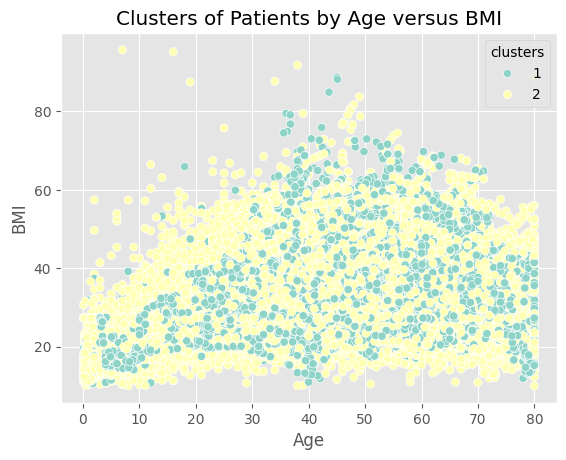

In [42]:
#pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Create a new column 'bmi/age' by dividing 'bmi' by 'age'
df_resampled['bmi/age'] = df_resampled['bmi'] / df_resampled['age']

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled, x='age', y='bmi', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Age versus BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

C:\Users\joyce\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


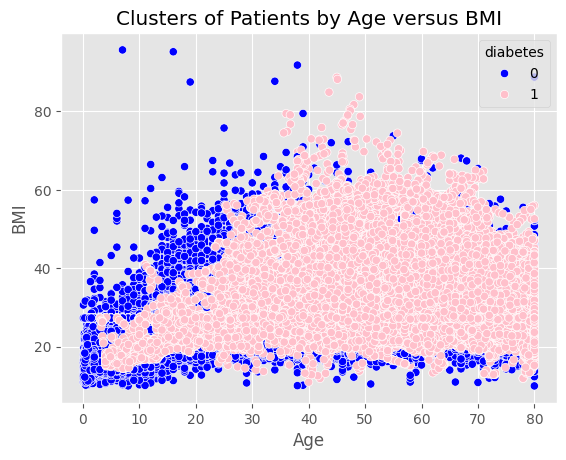

In [43]:
# Define custom colors for diabetes values
custom_palette = {0: 'blue', 1: 'pink'}

# Plot clusters using scatterplot with custom colors
sns.scatterplot(data=df_resampled, x='age', y='bmi', hue='diabetes', palette=custom_palette)
plt.title('Clusters of Patients by Age versus BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

C:\Users\joyce\AppData\Local\Temp\ipykernel_14376\1568644278.py:5: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(data=df_resampled, x='blood_glucose_level', y='HbA1c_level', hue='clusters', palette=pal)


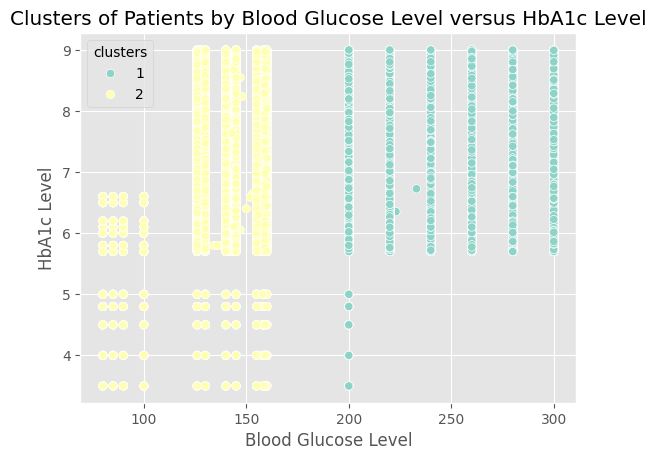

In [44]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled, x='blood_glucose_level', y='HbA1c_level', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Blood Glucose Level versus HbA1c Level')
plt.xlabel('Blood Glucose Level')
plt.ylabel('HbA1c Level')
plt.show()



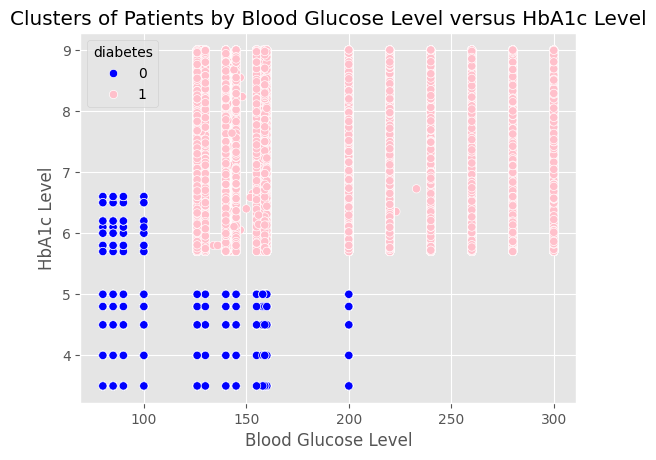

In [45]:
# Define custom colors for diabetes values
custom_palette = {0: 'blue', 1: 'pink'}

# Plot clusters using scatterplot with custom colors
sns.scatterplot(data=df_resampled, x='blood_glucose_level', y='HbA1c_level', hue='diabetes', palette=custom_palette)
plt.title('Clusters of Patients by Blood Glucose Level versus HbA1c Level')
plt.xlabel('Blood Glucose Level')
plt.ylabel('HbA1c Level')
plt.show()

C:\Users\joyce\AppData\Local\Temp\ipykernel_14376\2310973390.py:5: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(data=df_resampled, x='blood_glucose_level', y='age', hue='clusters', palette=pal)
C:\Users\joyce\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


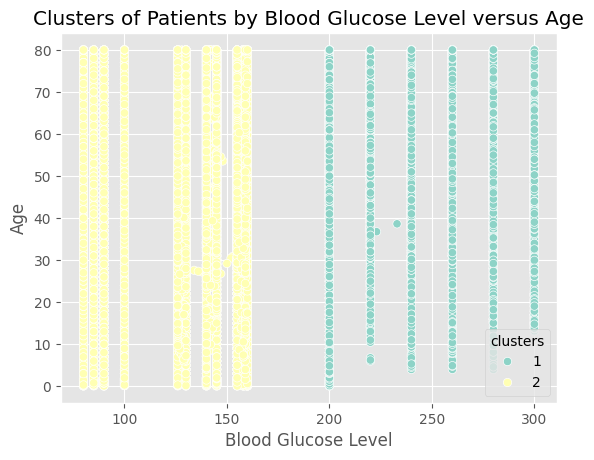

In [46]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled, x='blood_glucose_level', y='age', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Blood Glucose Level versus Age')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Age')
plt.show()

C:\Users\joyce\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


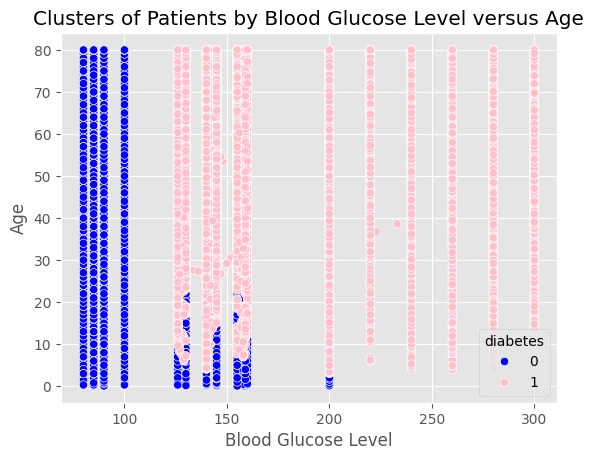

In [47]:
# Define custom colors for diabetes values
custom_palette = {0: 'blue', 1: 'pink'}

# Plot clusters using scatterplot with custom colors
sns.scatterplot(data=df_resampled, x='blood_glucose_level', y='age', hue='diabetes', palette=custom_palette)
plt.title('Clusters of Patients by Blood Glucose Level versus Age')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Age')
plt.show()

C:\Users\joyce\AppData\Local\Temp\ipykernel_14376\3429871096.py:5: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(data=df_resampled, x='blood_glucose_level', y='bmi', hue='clusters', palette=pal)


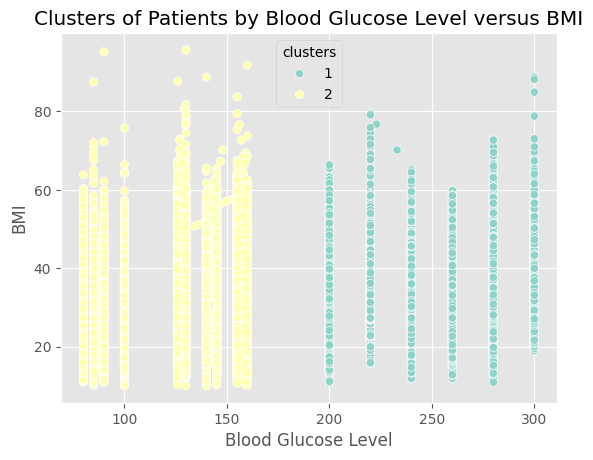

In [48]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled, x='blood_glucose_level', y='bmi', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Blood Glucose Level versus BMI')
plt.xlabel('Blood Glucose Level')
plt.ylabel('BMI')
plt.show()

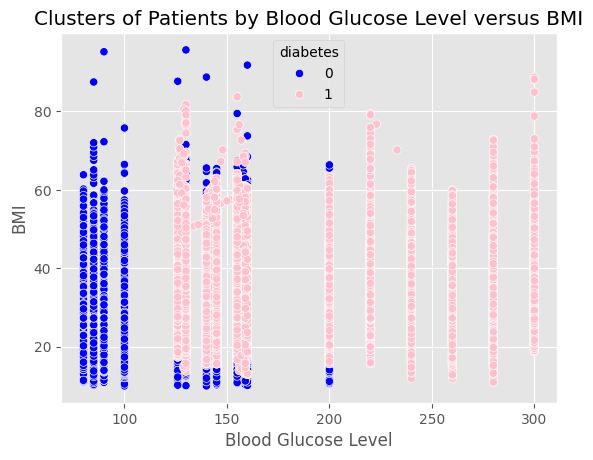

In [49]:
# Define custom colors for diabetes values
custom_palette = {0: 'blue', 1: 'pink'}

# Plot clusters using scatterplot with custom colors
sns.scatterplot(data=df_resampled, x='blood_glucose_level', y='bmi', hue='diabetes', palette=custom_palette)
plt.title('Clusters of Patients by Blood Glucose Level versus BMI')
plt.xlabel('Blood Glucose Level')
plt.ylabel('BMI')
plt.show()

C:\Users\joyce\AppData\Local\Temp\ipykernel_14376\1025642906.py:5: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(data=df_resampled, x='HbA1c_level', y='bmi', hue='clusters', palette=pal)


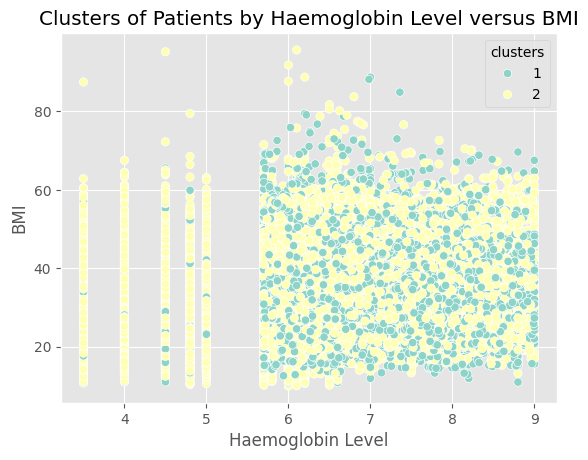

In [50]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled, x='HbA1c_level', y='bmi', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Haemoglobin Level versus BMI')
plt.xlabel('Haemoglobin Level')
plt.ylabel('BMI')
plt.show()

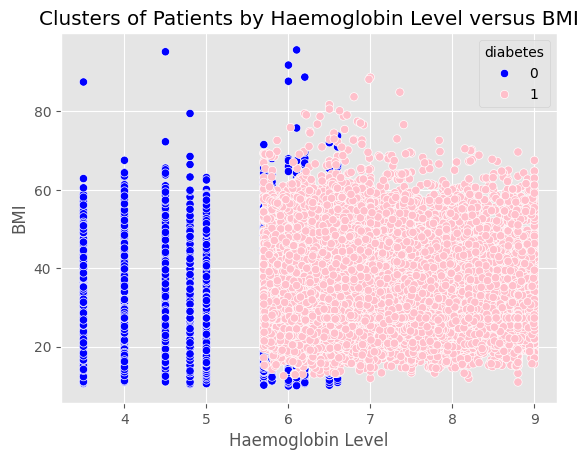

In [51]:
# Define custom colors for diabetes values
custom_palette = {0: 'blue', 1: 'pink'}

# Plot clusters using scatterplot with custom colors
sns.scatterplot(data=df_resampled, x='HbA1c_level', y='bmi', hue='diabetes', palette=custom_palette)
plt.title('Clusters of Patients by Haemoglobin Level versus BMI')
plt.xlabel('Haemoglobin Level')
plt.ylabel('BMI')
plt.show()

C:\Users\joyce\AppData\Local\Temp\ipykernel_14376\2588116518.py:5: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(data=df_resampled, x='HbA1c_level', y='age', hue='clusters', palette=pal)


C:\Users\joyce\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


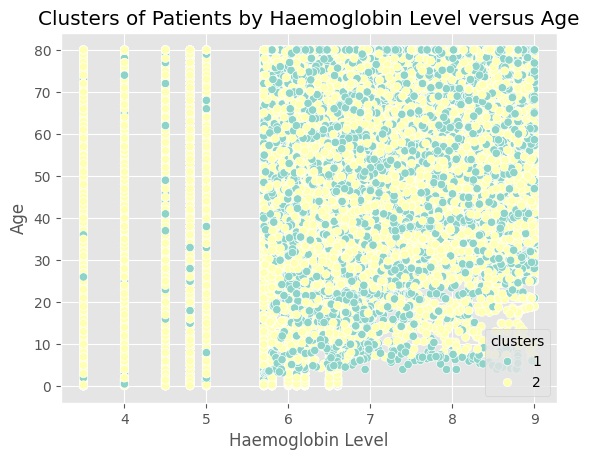

In [52]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled, x='HbA1c_level', y='age', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Haemoglobin Level versus Age')
plt.xlabel('Haemoglobin Level')
plt.ylabel('Age')
plt.show()

C:\Users\joyce\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


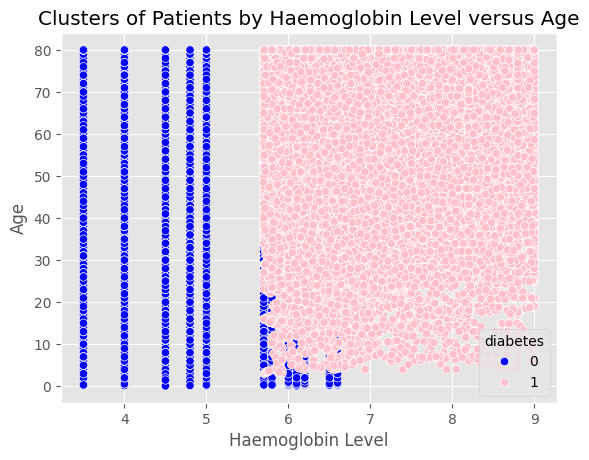

In [53]:
# Define custom colors for diabetes values
custom_palette = {0: 'blue', 1: 'pink'}

# Plot clusters using scatterplot with custom colors
sns.scatterplot(data=df_resampled, x='HbA1c_level', y='age', hue='diabetes', palette=custom_palette)
plt.title('Clusters of Patients by Haemoglobin Level versus Age')
plt.xlabel('Haemoglobin Level')
plt.ylabel('Age')
plt.show()

<h1> Bisecting KMeans <h1>

In [54]:
df_resampled_bisect 

age  hypertension  heart_disease        bmi  HbA1c_level  \
0       80.0             0              1  25.190000     6.600000   
1       54.0             0              0  27.320000     6.600000   
2       28.0             0              0  27.320000     5.700000   
3       36.0             0              0  23.450000     5.000000   
4       76.0             1              1  20.140000     4.800000   
...      ...           ...            ...        ...          ...   
182959  72.0             0              0  27.992175     6.760849   
182960  80.0             1              0  35.628573     6.100000   
182961  67.0             0              0  29.786139     6.134009   
182962  54.0             0              0  28.054402     5.800000   
182963  61.0             1              0  37.605755     8.527164   

        blood_glucose_level  smoking_history_encoded  gender_encoded  diabetes  
0                       140                -0.246527       -0.119227         0  
1                        80                -0.246527       -0.119227         0  
2                       158                -0.246527        0.150651         0  
3                       155                 0.450465       -0.119227         0  
4                       155                 0.450465        0.150651         0  
...                     ...                      ...             ...       ...  
182959                  160                -0.246527        0.150651         1  
182960                  260                 0.195045       -0.119227         1  
182961                  159                -0.154536       -0.083607         1  
182962                  145                 0.255308        0.075086         1  
182963                  200                 0.230756        0.065579         1  

[182964 rows x 9 columns]

In [55]:
X_bisect = df_resampled_bisect.iloc[:, 0:8]
y_bisect = df_resampled_bisect.iloc[:, -1]


# Instantiate BisectingKMeans with desired number of clusters
bkm = BisectingKMeans(n_clusters=2, random_state=424)

# Fit the model to the data
bkm.fit(X_bisect)



# Predict the clusters for the data points
labels = bkm.predict(X_bisect) + 1

# Print the cluster centers
print("Cluster centers:")
print(bkm.cluster_centers_)

X_bisect['clusters']=labels
X_bisect

Cluster centers:
[[ 5.83058243e+01  9.27386567e-02  4.86867783e-02  3.12140281e+01
   6.67619057e+00  2.44133518e+02  3.79934862e-02  6.82507083e-03]
 [ 4.76672203e+01  7.36776007e-02  3.67191939e-02  2.87793662e+01
   5.94923641e+00  1.33821099e+02 -1.35188174e-02 -2.90164780e-03]]


age  hypertension  heart_disease        bmi  HbA1c_level  \
0       80.0             0              1  25.190000     6.600000   
1       54.0             0              0  27.320000     6.600000   
2       28.0             0              0  27.320000     5.700000   
3       36.0             0              0  23.450000     5.000000   
4       76.0             1              1  20.140000     4.800000   
...      ...           ...            ...        ...          ...   
182959  72.0             0              0  27.992175     6.760849   
182960  80.0             1              0  35.628573     6.100000   
182961  67.0             0              0  29.786139     6.134009   
182962  54.0             0              0  28.054402     5.800000   
182963  61.0             1              0  37.605755     8.527164   

        blood_glucose_level  smoking_history_encoded  gender_encoded  clusters  
0                       140                -0.246527       -0.119227         2  
1                        80                -0.246527       -0.119227         2  
2                       158                -0.246527        0.150651         2  
3                       155                 0.450465       -0.119227         2  
4                       155                 0.450465        0.150651         2  
...                     ...                      ...             ...       ...  
182959                  160                -0.246527        0.150651         2  
182960                  260                 0.195045       -0.119227         1  
182961                  159                -0.154536       -0.083607         2  
182962                  145                 0.255308        0.075086         2  
182963                  200                 0.230756        0.065579         1  

[182964 rows x 9 columns]

In [56]:
# Assign the 'clusters' column to the original DataFrame
df_resampled_bisect['clusters'] = X_bisect['clusters']

# Display the DataFrame with added 'clusters' column
df_resampled_bisect

age  hypertension  heart_disease        bmi  HbA1c_level  \
0       80.0             0              1  25.190000     6.600000   
1       54.0             0              0  27.320000     6.600000   
2       28.0             0              0  27.320000     5.700000   
3       36.0             0              0  23.450000     5.000000   
4       76.0             1              1  20.140000     4.800000   
...      ...           ...            ...        ...          ...   
182959  72.0             0              0  27.992175     6.760849   
182960  80.0             1              0  35.628573     6.100000   
182961  67.0             0              0  29.786139     6.134009   
182962  54.0             0              0  28.054402     5.800000   
182963  61.0             1              0  37.605755     8.527164   

        blood_glucose_level  smoking_history_encoded  gender_encoded  \
0                       140                -0.246527       -0.119227   
1                        80                -0.246527       -0.119227   
2                       158                -0.246527        0.150651   
3                       155                 0.450465       -0.119227   
4                       155                 0.450465        0.150651   
...                     ...                      ...             ...   
182959                  160                -0.246527        0.150651   
182960                  260                 0.195045       -0.119227   
182961                  159                -0.154536       -0.083607   
182962                  145                 0.255308        0.075086   
182963                  200                 0.230756        0.065579   

        diabetes  clusters  
0              0         2  
1              0         2  
2              0         2  
3              0         2  
4              0         2  
...          ...       ...  
182959         1         2  
182960         1         1  
182961         1         2  
182962         1         2  
182963         1         1  

[182964 rows x 10 columns]

<h1> Logistic Prediction on bisect Cluster groups <h1>

In [57]:
# Iterate over unique cluster values
for cluster_value in df_resampled_bisect['clusters'].unique():
    # Create a DataFrame for the current cluster
    cluster_idx_bisect = df_resampled_bisect[df_resampled_bisect['clusters'] == cluster_value].copy()
    
    # Create a variable for the current DataFrame
    globals()[f'cluster_{cluster_value}_bisect'] = cluster_idx_bisect

In [58]:
cluster_2_bisect

age  hypertension  heart_disease        bmi  HbA1c_level  \
0       80.000000             0              1  25.190000     6.600000   
1       54.000000             0              0  27.320000     6.600000   
2       28.000000             0              0  27.320000     5.700000   
3       36.000000             0              0  23.450000     5.000000   
4       76.000000             1              1  20.140000     4.800000   
...           ...           ...            ...        ...          ...   
182956  39.756151             0              0  37.200158     6.697539   
182957  64.001688             0              0  28.937266     6.200506   
182959  72.000000             0              0  27.992175     6.760849   
182961  67.000000             0              0  29.786139     6.134009   
182962  54.000000             0              0  28.054402     5.800000   

        blood_glucose_level  smoking_history_encoded  gender_encoded  \
0                       140                -0.246527       -0.119227   
1                        80                -0.246527       -0.119227   
2                       158                -0.246527        0.150651   
3                       155                 0.450465       -0.119227   
4                       155                 0.450465        0.150651   
...                     ...                      ...             ...   
182956                  155                 0.280504       -0.119227   
182957                  140                 0.449289       -0.118771   
182959                  160                -0.246527        0.150651   
182961                  159                -0.154536       -0.083607   
182962                  145                 0.255308        0.075086   

        diabetes  clusters  
0              0         2  
1              0         2  
2              0         2  
3              0         2  
4              0         2  
...          ...       ...  
182956         1         2  
182957         1         2  
182959         1         2  
182961         1         2  
182962         1         2  

[133772 rows x 10 columns]

In [59]:
X_cluster_1_bisect = cluster_1_bisect.drop('diabetes', axis=1)  # Features
X_cluster_1_bisect = X_cluster_1_bisect.drop('clusters', axis = 1)
y_cluster_1_bisect = cluster_1_bisect['diabetes']  # Target variable


# Split the data into training and test sets
X_train_cluster_1_bisect, X_test_cluster_1_bisect, y_train_cluster_1_bisect, y_test_cluster_1_bisect = train_test_split(X_cluster_1_bisect, y_cluster_1_bisect, test_size=0.3, random_state=424)

# Initialize the logistic regression model
logreg_1_bisect = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_1_bisect.fit(X_train_cluster_1_bisect, y_train_cluster_1_bisect)

# Make predictions on the test data
predictions_1_bisect = logreg_1_bisect.predict(X_test_cluster_1_bisect)

# Evaluate the model
accuracy = accuracy_score(y_test_cluster_1_bisect, predictions_1_bisect)
classification_rep = classification_report(y_test_cluster_1_bisect, predictions_1_bisect)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9577856078059358
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      2036
           1       0.97      0.98      0.98     12722

    accuracy                           0.96     14758
   macro avg       0.92      0.90      0.91     14758
weighted avg       0.96      0.96      0.96     14758



c:\Users\joyce\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
X_cluster_2_bisect = cluster_2_bisect.drop('diabetes', axis=1)  # Features
X_cluster_2_bisect = X_cluster_2_bisect.drop('clusters', axis = 1)
y_cluster_2_bisect = cluster_2_bisect['diabetes']  # Target variable


# Split the data into training and test sets
X_train_cluster_2_bisect, X_test_cluster_2_bisect, y_train_cluster_2_bisect, y_test_cluster_2_bisect = train_test_split(X_cluster_2_bisect, y_cluster_2_bisect, test_size=0.3, random_state=222)

# Initialize the logistic regression model
logreg_2_bisect = LogisticRegression(random_state=222)

# Fit the model on the training data
logreg_2_bisect.fit(X_train_cluster_2_bisect, y_train_cluster_2_bisect)

# Make predictions on the test data
predictions_2_bisect = logreg_2_bisect.predict(X_test_cluster_2_bisect)

# Evaluate the model
accuracy = accuracy_score(y_test_cluster_2_bisect, predictions_2_bisect)
classification_rep = classification_report(y_test_cluster_2_bisect, predictions_2_bisect)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8650951858865743
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89     25383
           1       0.82      0.81      0.82     14749

    accuracy                           0.87     40132
   macro avg       0.86      0.85      0.85     40132
weighted avg       0.86      0.87      0.86     40132



c:\Users\joyce\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Combine features and labels from all clusters
X_bisect_combined = np.concatenate((X_cluster_1_bisect, X_cluster_2_bisect), axis=0)
y_bisect_combined = np.concatenate((y_cluster_1_bisect, y_cluster_2_bisect), axis=0)

# Split the bisect_combined data into training and test sets
X_train_bisect_combined, X_test_bisect_combined, y_train_bisect_combined, y_test_bisect_combined = train_test_split(X_bisect_combined, y_bisect_combined, test_size=0.3, random_state=424)

# Create a list of tuples where each tuple is (model_name, model_instance)
model_tuple_list = [('cluster_2_bisect', logreg_2_bisect), ('cluster_1_bisect', logreg_1_bisect)]

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=model_tuple_list, voting='hard')

# Fit the VotingClassifier on the bisect_combined training set
voting_clf.fit(X_train_bisect_combined, y_train_bisect_combined)

# Make predictions using the ensemble model on the bisect_combined test set
ensemble_predictions_bisect = voting_clf.predict(X_test_bisect_combined)

# Evaluate the ensemble model
accuracy_ensemble_bisect = accuracy_score(y_test_bisect_combined, ensemble_predictions)

# Calculate precision
precision_ensemble_bisect = precision_score(y_test_bisect_combined, ensemble_predictions_bisect, average='weighted')

# Calculate recall
recall_ensemble_bisect = recall_score(y_test_bisect_combined, ensemble_predictions_bisect, average='weighted')

# Calculate F1-score
f1_ensemble_bisect = f1_score(y_test_bisect_combined, ensemble_predictions_bisect, average='weighted')


classification_report_ensemble_bisect = classification_report(y_test_bisect_combined, ensemble_predictions_bisect)

print(f"Ensemble Bisect Model Accuracy: {accuracy_ensemble_bisect}")
print(f"Ensemble Bisect Model Precision: {precision_ensemble_bisect}")
print(f"Ensemble Bisect Model Recall: {recall_ensemble_bisect}")
print(f"Ensemble Bisect Model F1-score: {f1_ensemble_bisect}")


print("Ensemble Bisect Model Classification Report:")
print(classification_report_ensemble_bisect)

c:\Users\joyce\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\joyce\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Ensemble Bisect Model Accuracy: 0.9783931499362362
Ensemble Bisect Model Precision: 0.8848971052751419
Ensemble Bisect Model Recall: 0.8848970668609947
Ensemble Bisect Model F1-score: 0.8848970848932464
Ensemble Bisect Model Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     27326
           1       0.89      0.89      0.89     27564

    accuracy                           0.88     54890
   macro avg       0.88      0.88      0.88     54890
weighted avg       0.88      0.88      0.88     54890



In [62]:
from sklearn.metrics import roc_auc_score
# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=model_tuple_list, voting='soft')

# Fit the VotingClassifier on the bisect_combined training set
voting_clf.fit(X_train_bisect_combined, y_train_bisect_combined)


# Calculate predicted probabilities for each class
ensemble_probabilities = voting_clf.predict_proba(X_test_bisect_combined)

# Extract the predicted probabilities for the positive class (class 1)
positive_class_probabilities = ensemble_probabilities[:, 1]

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test_bisect_combined, positive_class_probabilities)

print(f"AUC-ROC Score: {auc_roc}")


c:\Users\joyce\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC-ROC Score: 0.9620852079801867


c:\Users\joyce\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<h1>Random Forests model on bisect clusters<h1>

In [63]:
# Split the data into training and test sets
X_train_cluster_1_bisect, X_test_cluster_1_bisect, y_train_cluster_1_bisect, y_test_cluster_1_bisect = train_test_split(X_cluster_1_bisect, y_cluster_1_bisect, test_size=0.3, random_state=424)


# Create and train the first Random Forest model
rf_model1_bisect = RandomForestClassifier(n_estimators=100, random_state=424)
rf_model1_bisect.fit(X_train_cluster_1_bisect, y_train_cluster_1_bisect)


# Make predictions using the first Random Forest model
y_pred_rf1_bisect = rf_model1_bisect.predict(X_test_cluster_1_bisect)


# Calculate accuracy for the first Random Forest model
accuracy_rf1_bisect = accuracy_score(y_test_cluster_1_bisect, y_pred_rf1_bisect)
print("Random Forest Model 1 Bisect Accuracy:", accuracy_rf1_bisect)

classification_rep = classification_report(y_test_cluster_1_bisect, y_pred_rf1_bisect)

print("Classification Report:")
print(classification_rep)

# Perform cross-validation
cv_scores = cross_val_score(rf_model1_bisect, X_train_cluster_1_bisect, y_train_cluster_1_bisect, cv=5, scoring='accuracy')
print("Cross-validated Biscet Accuracy Scores:", cv_scores)
print("Mean Cross-validated Bisect Accuracy:", cv_scores.mean())



Random Forest Model 1 Bisect Accuracy: 0.9908524190269684
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2036
           1       1.00      0.99      0.99     12722

    accuracy                           0.99     14758
   macro avg       0.98      0.98      0.98     14758
weighted avg       0.99      0.99      0.99     14758

Cross-validated Biscet Accuracy Scores: [0.98780311 0.9863511  0.9869319  0.98896472 0.98838222]
Mean Cross-validated Bisect Accuracy: 0.987686609038037


In [64]:
# Split the data into training and test sets
X_train_cluster_2_bisect, X_test_cluster_2_bisect, y_train_cluster_2_bisect, y_test_cluster_2_bisect = train_test_split(X_cluster_2_bisect, y_cluster_2_bisect, test_size=0.3, random_state=424)


# Create and train the first Random Forest model
rf_model2_bisect = RandomForestClassifier(n_estimators=100, random_state=424)
rf_model2_bisect.fit(X_train_cluster_2_bisect, y_train_cluster_2_bisect)


# Make predictions using the first Random Forest model
y_pred_rf2_bisect = rf_model2_bisect.predict(X_test_cluster_2_bisect)


# Calculate accuracy for the first Random Forest model
accuracy_rf2_bisect = accuracy_score(y_test_cluster_2_bisect, y_pred_rf2_bisect)
print("Random Forest Model 2 Bisect Accuracy:", accuracy_rf2_bisect)

classification_rep = classification_report(y_test_cluster_2_bisect, y_pred_rf2_bisect)

print("Classification Report:")
print(classification_rep)

# Perform cross-validation
cv_scores = cross_val_score(rf_model2_bisect, X_train_cluster_2_bisect, y_train_cluster_2_bisect, cv=5, scoring='accuracy')
print("Cross-validated Biscet Accuracy Scores:", cv_scores)
print("Mean Cross-validated Bisect Accuracy:", cv_scores.mean())



Random Forest Model 2 Bisect Accuracy: 0.9745340376756703
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     25381
           1       0.98      0.95      0.96     14751

    accuracy                           0.97     40132
   macro avg       0.97      0.97      0.97     40132
weighted avg       0.97      0.97      0.97     40132

Cross-validated Biscet Accuracy Scores: [0.97223409 0.97453012 0.97303503 0.97063221 0.97308842]
Mean Cross-validated Bisect Accuracy: 0.972703972661256


In [65]:
# Combine features and labels from all clusters
X_bisect_combined_rf = np.concatenate((X_cluster_1_bisect, X_cluster_2_bisect), axis=0)
y_bisect_combined_rf = np.concatenate((y_cluster_1_bisect, y_cluster_2_bisect), axis=0)

# Split the combined_rf data into training and test sets
X_train_combined_rf_bisect, X_test_combined_rf_bisect, y_train_combined_rf_bisect, y_test_combined_rf_bisect = train_test_split(X_bisect_combined_rf, y_bisect_combined_rf, test_size=0.3, random_state=424)

# Create a list of tuples where each tuple is (model_name, model_instance)
model_tuple_list = [('cluster_1_bisect', rf_model1_bisect), ('cluster_2_bisect', rf_model2_bisect)]

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=model_tuple_list, voting='hard')

# Fit the VotingClassifier on the combined_rf training set
voting_clf.fit(X_train_combined_rf_bisect, y_train_combined_rf_bisect)

# Make predictions using the ensemble model on the combined_rf test set
ensemble_predictions = voting_clf.predict(X_test_combined_rf_bisect)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(y_test_combined_rf_bisect, ensemble_predictions)

# Calculate precision
precision_ensemble = precision_score(y_test_combined_rf_bisect, ensemble_predictions, average='weighted')

# Calculate recall
recall_ensemble = recall_score(y_test_combined_rf_bisect, ensemble_predictions, average='weighted')

# Calculate F1-score
f1_ensemble = f1_score(y_test_combined_rf_bisect, ensemble_predictions, average='weighted')

classification_report_ensemble = classification_report(y_test_combined_rf_bisect, ensemble_predictions)

print(f"Ensemble Model Accuracy: {accuracy_ensemble}")
print(f"Ensemble Model Precision: {precision_ensemble}")
print(f"Ensemble Model Recall: {recall_ensemble}")
print(f"Ensemble Model F1-score: {f1_ensemble}")


print("Ensemble Model Classification Report:")
print(classification_report_ensemble)

Ensemble Model Accuracy: 0.9783931499362362
Ensemble Model Precision: 0.9785614261314131
Ensemble Model Recall: 0.9783931499362362
Ensemble Model F1-score: 0.9783921438473712
Ensemble Model Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27326
           1       0.99      0.97      0.98     27564

    accuracy                           0.98     54890
   macro avg       0.98      0.98      0.98     54890
weighted avg       0.98      0.98      0.98     54890



In [66]:
from sklearn.metrics import roc_auc_score

# Fit the VotingClassifier on the combined_rf training set
voting_clf.fit(X_train_combined_rf_bisect, y_train_combined_rf_bisect)

# Initialize an empty array to store the predicted probabilities
ensemble_probabilities = np.zeros((len(X_test_combined_rf_bisect), 2))  # Assuming binary classification

# Iterate over individual models in the ensemble
for estimator in voting_clf.estimators_:
    # Calculate the predicted probabilities for each class
    class_probabilities = estimator.predict_proba(X_test_combined_rf_bisect)
    # Aggregate the predicted probabilities
    ensemble_probabilities += class_probabilities

# Take the average of the predicted probabilities
ensemble_probabilities /= len(voting_clf.estimators_)

# Extract the probabilities for the positive class (assuming binary classification)
positive_class_probabilities = ensemble_probabilities[:, 1]

# Now you can use positive_class_probabilities for further analysis, such as calculating AUC-ROC
# Calculate AUC-ROC
auc = roc_auc_score(y_test_combined_rf_bisect, positive_class_probabilities)

print(f"Ensemble Model AUC-ROC: {auc}")





Ensemble Model AUC-ROC: 0.9972878625877232


<h1>EDA on bisect clusters<h1>

C:\Users\joyce\AppData\Local\Temp\ipykernel_14376\3354916287.py:8: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(data=df_resampled_bisect, x='age', y='bmi', hue='clusters', palette=pal)


C:\Users\joyce\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


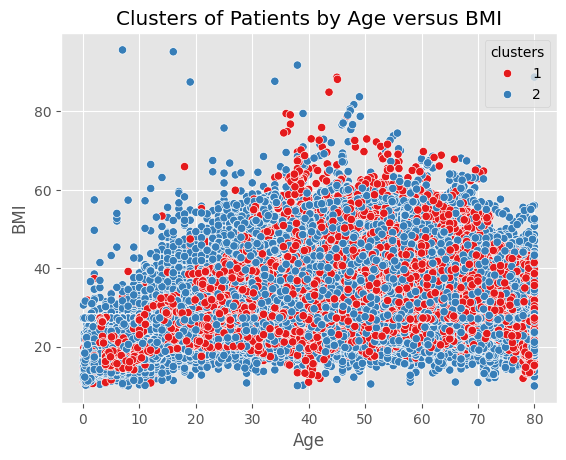

In [67]:
#pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set1', 4)

# Create a new column 'bmi/age' by dividing 'bmi' by 'age'
df_resampled_bisect['bmi/age'] = df_resampled_bisect['bmi'] / df_resampled_bisect['age']

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled_bisect, x='age', y='bmi', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Age versus BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

C:\Users\joyce\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


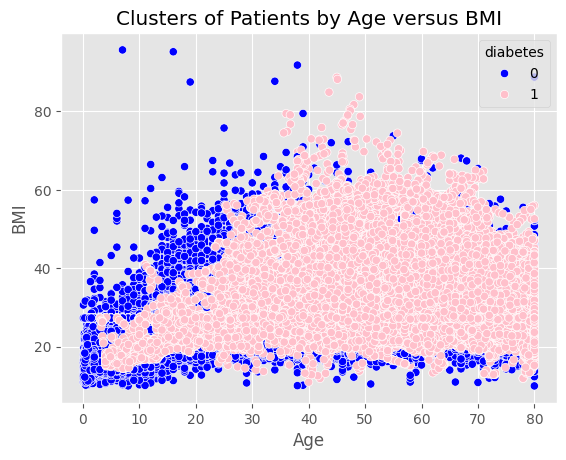

In [68]:
# Define custom colors for diabetes values
custom_palette = {0: 'blue', 1: 'pink'}

# Plot clusters using scatterplot with custom colors
sns.scatterplot(data=df_resampled_bisect, x='age', y='bmi', hue='diabetes', palette=custom_palette)
plt.title('Clusters of Patients by Age versus BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

C:\Users\joyce\AppData\Local\Temp\ipykernel_14376\3339985707.py:5: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(data=df_resampled_bisect, x='blood_glucose_level', y='HbA1c_level', hue='clusters', palette=pal)


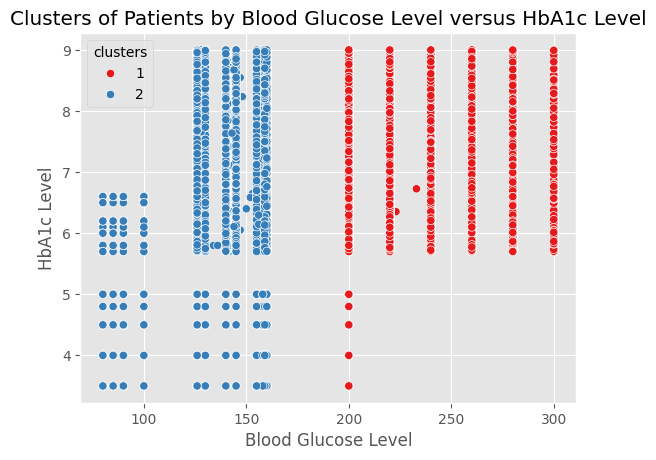

In [69]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set1', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled_bisect, x='blood_glucose_level', y='HbA1c_level', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Blood Glucose Level versus HbA1c Level')
plt.xlabel('Blood Glucose Level')
plt.ylabel('HbA1c Level')
plt.show()




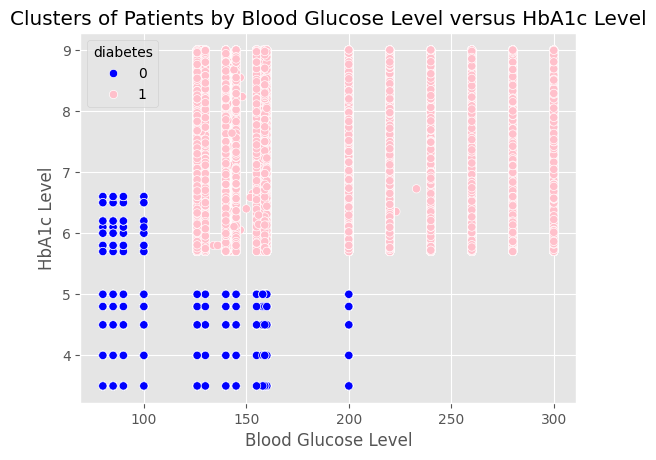

In [70]:
# Define custom colors for diabetes values
custom_palette = {0: 'blue', 1: 'pink'}

# Plot clusters using scatterplot with custom colors
sns.scatterplot(data=df_resampled_bisect, x='blood_glucose_level', y='HbA1c_level', hue='diabetes', palette=custom_palette)
plt.title('Clusters of Patients by Blood Glucose Level versus HbA1c Level')
plt.xlabel('Blood Glucose Level')
plt.ylabel('HbA1c Level')
plt.show()

C:\Users\joyce\AppData\Local\Temp\ipykernel_14376\662216294.py:5: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(data=df_resampled_bisect, x='blood_glucose_level', y='age', hue='clusters', palette=pal)


C:\Users\joyce\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


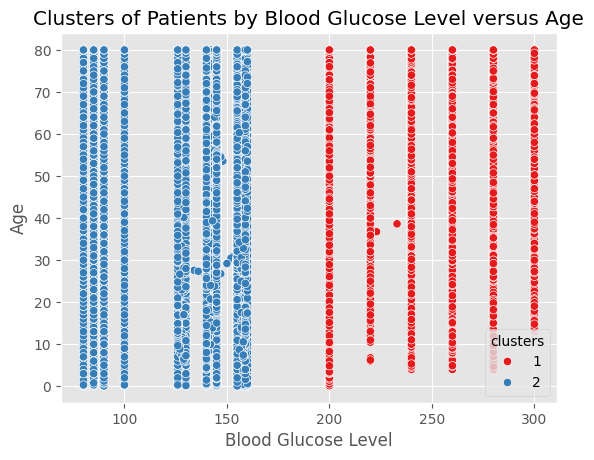

In [71]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set1', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled_bisect, x='blood_glucose_level', y='age', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Blood Glucose Level versus Age')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Age')
plt.show()

C:\Users\joyce\AppData\Local\Temp\ipykernel_14376\2554424957.py:5: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(data=df_resampled_bisect, x='blood_glucose_level', y="bmi", hue='clusters', palette=pal)


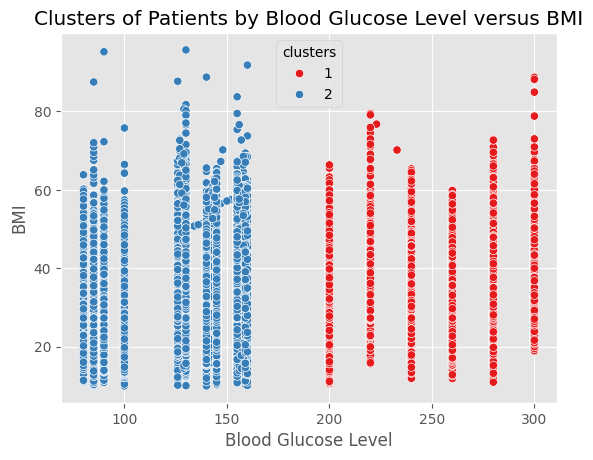

In [72]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set1', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled_bisect, x='blood_glucose_level', y="bmi", hue='clusters', palette=pal)
plt.title('Clusters of Patients by Blood Glucose Level versus BMI')
plt.xlabel('Blood Glucose Level')
plt.ylabel('BMI')
plt.show()

C:\Users\joyce\AppData\Local\Temp\ipykernel_14376\2031979185.py:5: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(data=df_resampled_bisect, x='HbA1c_level', y="bmi", hue='clusters', palette=pal)


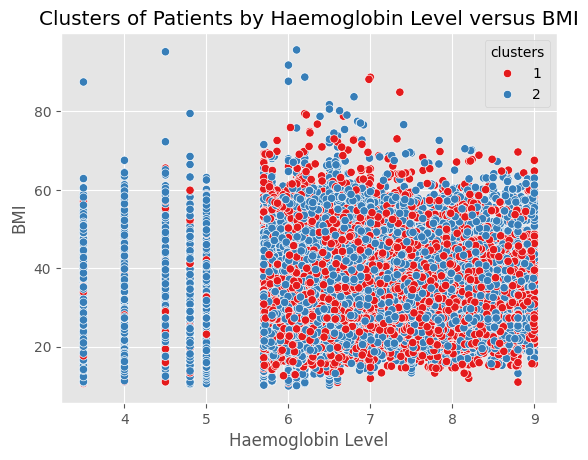

In [73]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set1', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled_bisect, x='HbA1c_level', y="bmi", hue='clusters', palette=pal)
plt.title('Clusters of Patients by Haemoglobin Level versus BMI')
plt.xlabel('Haemoglobin Level')
plt.ylabel('BMI')
plt.show()

C:\Users\joyce\AppData\Local\Temp\ipykernel_14376\764820364.py:5: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(data=df_resampled_bisect, x='HbA1c_level', y="age", hue='clusters', palette=pal)


C:\Users\joyce\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


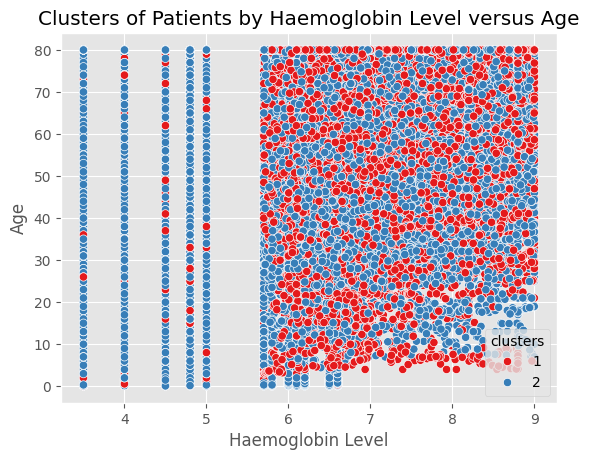

In [74]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set1', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled_bisect, x='HbA1c_level', y="age", hue='clusters', palette=pal)
plt.title('Clusters of Patients by Haemoglobin Level versus Age')
plt.xlabel('Haemoglobin Level')
plt.ylabel('Age')
plt.show()

<h1> Features Importance Incorporated <h1>

<h1>K-Means Important Clustering <h1>

In [75]:
columns_to_drop = ["hypertension", "heart_disease", "smoking_history_encoded", "gender_encoded"]
df_resampled_imp = df_resampled.copy()
df_resampled_imp = df_resampled_imp.drop(columns=columns_to_drop)

df_important_bisect = df_resampled_imp.copy()

In [76]:
X_important = df_resampled_imp.iloc[:, 0:4]
y = df_resampled_imp.iloc[:, -1]

In [77]:
# Fit KMeans model
model=KMeans(n_clusters=2, n_init=10, random_state=424)
model.fit(X_important)

labels=model.labels_ + 1
labels  #clustering into 2 groups: 0 and 1

centers=model.cluster_centers_
centers

model.inertia_

X_important['clusters']=labels
X_important

age        bmi  HbA1c_level  blood_glucose_level  clusters
0       80.0  25.190000     6.600000                  140         2
1       54.0  27.320000     6.600000                   80         2
2       28.0  27.320000     5.700000                  158         2
3       36.0  23.450000     5.000000                  155         2
4       76.0  20.140000     4.800000                  155         2
...      ...        ...          ...                  ...       ...
182959  72.0  27.992175     6.760849                  160         2
182960  80.0  35.628573     6.100000                  260         1
182961  67.0  29.786139     6.134009                  159         2
182962  54.0  28.054402     5.800000                  145         2
182963  61.0  37.605755     8.527164                  200         1

[182964 rows x 5 columns]

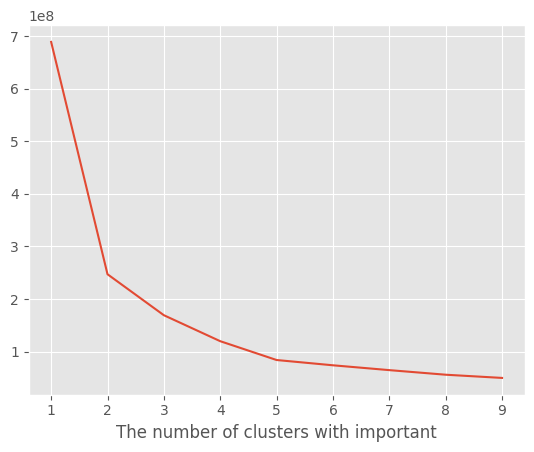

In [78]:
inertia_train={}
for n_cluster in range(1,10):
    model=KMeans(n_clusters=n_cluster, n_init=10, random_state =424)
    model.fit(X_important)
    inertia_train[n_cluster]=model.inertia_
    
plt.plot(range(1,10),inertia_train.values())
plt.xlabel('The number of clusters with important') #inertia is the measure of each dots to its centers: tight clusters, low inertia
plt.show()

In [79]:
# Assign the 'clusters' column to the original DataFrame
df_resampled_imp['clusters'] = X_important['clusters']

# Display the DataFrame with added 'clusters' column
df_resampled_imp

age        bmi  HbA1c_level  blood_glucose_level  diabetes  clusters  \
0       80.0  25.190000     6.600000                  140         0         2   
1       54.0  27.320000     6.600000                   80         0         2   
2       28.0  27.320000     5.700000                  158         0         2   
3       36.0  23.450000     5.000000                  155         0         2   
4       76.0  20.140000     4.800000                  155         0         2   
...      ...        ...          ...                  ...       ...       ...   
182959  72.0  27.992175     6.760849                  160         1         2   
182960  80.0  35.628573     6.100000                  260         1         1   
182961  67.0  29.786139     6.134009                  159         1         2   
182962  54.0  28.054402     5.800000                  145         1         2   
182963  61.0  37.605755     8.527164                  200         1         1   

         bmi/age  
0       0.314875  
1       0.505926  
2       0.975714  
3       0.651389  
4       0.265000  
...          ...  
182959  0.388780  
182960  0.445357  
182961  0.444569  
182962  0.519526  
182963  0.616488  

[182964 rows x 7 columns]

In [80]:
important_1 = df_resampled_imp[df_resampled_imp["clusters"] == 1]
important_2 = df_resampled_imp[df_resampled_imp["clusters"] == 2]


In [81]:
X_important_2 = important_2.drop('diabetes', axis=1)  # Features
X_important_2 = X_important_2.drop('clusters', axis = 1)
y_important_2 = important_2['diabetes']  # Target variable


# Split the data into training and test sets
X_train_important_2, X_test_important_2, y_train_important_2, y_test_important_2 = train_test_split(X_important_2, y_important_2, test_size=0.1, random_state=222)

# Initialize the logistic regression model
logreg_2 = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_2.fit(X_train_important_2, y_train_important_2)

# Make predictions on the test data
predictions_2 = logreg_2.predict(X_test_important_2)

# Evaluate the model
accuracy = accuracy_score(y_test_important_2, predictions_2)
classification_rep = classification_report(y_test_important_2, predictions_2)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8606667663327852
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      8504
           1       0.81      0.81      0.81      4874

    accuracy                           0.86     13378
   macro avg       0.85      0.85      0.85     13378
weighted avg       0.86      0.86      0.86     13378



In [82]:
X_important_1 = important_1.drop('diabetes', axis=1)  # Features
X_important_1 = X_important_1.drop('clusters', axis = 1)
y_important_1 = important_1['diabetes']  # Target variable


# Split the data into training and test sets
X_train_important_1, X_test_important_1, y_train_important_1, y_test_important_1 = train_test_split(X_important_1, y_important_1, test_size=0.1, random_state=222)

# Initialize the logistic regression model
logreg_1 = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_1.fit(X_train_important_1, y_train_important_1)

# Make predictions on the test data
predictions_1 = logreg_1.predict(X_test_important_1)

# Evaluate the model
accuracy = accuracy_score(y_test_important_1, predictions_1)
classification_rep = classification_report(y_test_important_1, predictions_1)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9540650406504065
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.80      0.83       668
           1       0.97      0.98      0.97      4252

    accuracy                           0.95      4920
   macro avg       0.91      0.89      0.90      4920
weighted avg       0.95      0.95      0.95      4920



In [83]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

# Combine features and labels from all importants
X_combined_important = np.concatenate((X_important_1, X_important_2), axis=0)
y_combined_important = np.concatenate((y_important_1, y_important_2), axis=0)

# Split the combined_important data into training and test sets
X_train_combined_important, X_test_combined_important, y_train_combined_important, y_test_combined_important = train_test_split(X_combined_important, y_combined_important, test_size=0.3, random_state=424)

# Create a list of tuples where each tuple is (model_name, model_instance)
model_tuple_list = [  ('important_2', logreg_2), ('important_1', logreg_1)]

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=model_tuple_list, voting='hard')

# Fit the VotingClassifier on the combined_important training set
voting_clf.fit(X_train_combined_important, y_train_combined_important)

# Make predictions using the ensemble model on the combined_important test set
ensemble_predictions = voting_clf.predict(X_test_combined_important)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(y_test_combined_important, ensemble_predictions)
# Calculate precision
precision_ensemble = precision_score(y_test_combined_important, ensemble_predictions, average='weighted')
# Calculate recall
recall_ensemble = recall_score(y_test_combined_important, ensemble_predictions, average='weighted')
# Calculate F1-score
f1_ensemble = f1_score(y_test_combined_important, ensemble_predictions, average='weighted')
# Calculate the AUC score
auc_ensemble = roc_auc_score(y_test_combined_important, ensemble_predictions)


classification_report_ensemble = classification_report(y_test_combined_important, ensemble_predictions)

print(f"Ensemble Model Accuracy: {accuracy_ensemble}")
print(f"Ensemble Model Precision: {precision_ensemble}")
print(f"Ensemble Model Recall: {recall_ensemble}")
print(f"Ensemble Model f1: {f1_ensemble}")
print(f"Ensemble Model AUC ROC: {auc_ensemble}")
print("Ensemble Model Classification Report:")
print(classification_report_ensemble)

Ensemble Model Accuracy: 0.8830023683731099
Ensemble Model Precision: 0.8830040203011591
Ensemble Model Recall: 0.8830023683731099
Ensemble Model f1: 0.8830014112083778
Ensemble Model AUC ROC: 0.8829940071310212
Ensemble Model Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     27326
           1       0.88      0.88      0.88     27564

    accuracy                           0.88     54890
   macro avg       0.88      0.88      0.88     54890
weighted avg       0.88      0.88      0.88     54890



C:\Users\joyce\AppData\Local\Temp\ipykernel_14376\3882425991.py:5: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(data=df_resampled_imp, x='age', y='bmi', hue='clusters', palette=pal)


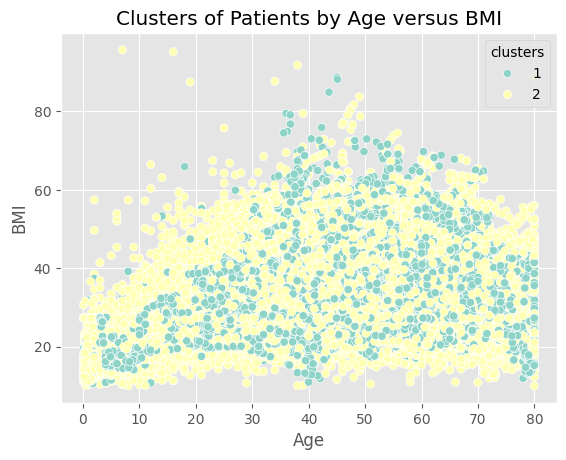

In [84]:
#pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled_imp, x='age', y='bmi', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Age versus BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

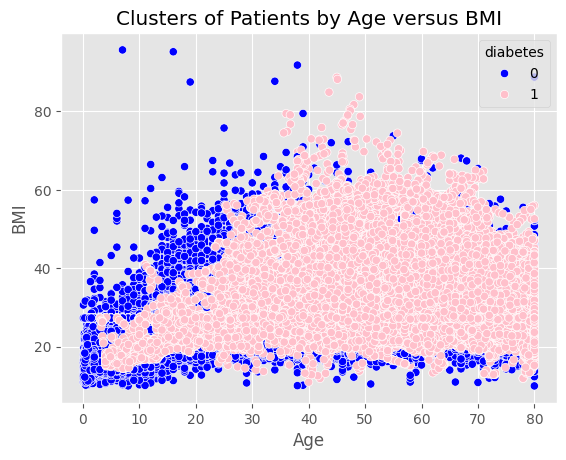

In [85]:
# Define custom colors for diabetes values
custom_palette = {0: 'blue', 1: 'pink'}

# Plot clusters using scatterplot with custom colors
sns.scatterplot(data=df_resampled_imp, x='age', y='bmi', hue='diabetes', palette=custom_palette)
plt.title('Clusters of Patients by Age versus BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

C:\Users\joyce\AppData\Local\Temp\ipykernel_14376\3631788765.py:5: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(data=df_resampled_imp, x='blood_glucose_level', y='HbA1c_level', hue='clusters', palette=pal)


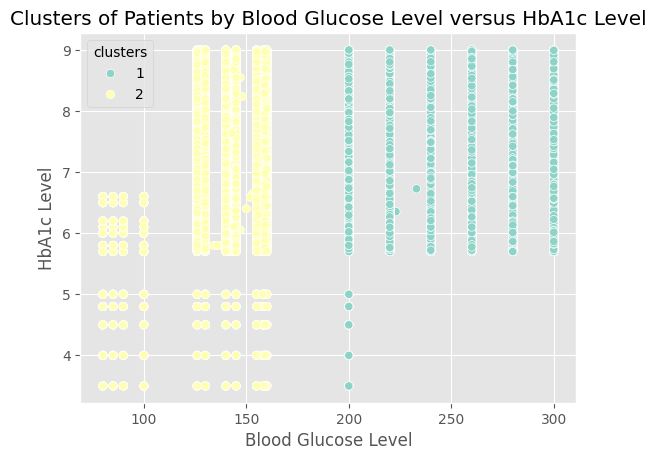

In [86]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled_imp, x='blood_glucose_level', y='HbA1c_level', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Blood Glucose Level versus HbA1c Level')
plt.xlabel('Blood Glucose Level')
plt.ylabel('HbA1c Level')
plt.show()

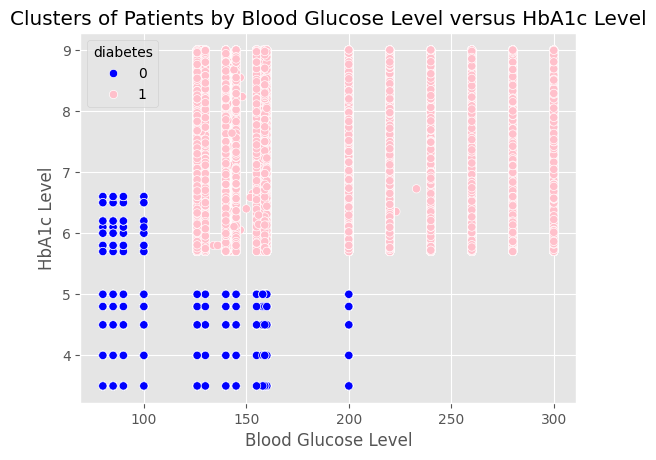

In [87]:
# Define custom colors for diabetes values
custom_palette = {0: 'blue', 1: 'pink'}

# Plot clusters using scatterplot with custom colors
sns.scatterplot(data=df_resampled_imp, x='blood_glucose_level', y='HbA1c_level', hue='diabetes', palette=custom_palette)
plt.title('Clusters of Patients by Blood Glucose Level versus HbA1c Level')
plt.xlabel('Blood Glucose Level')
plt.ylabel('HbA1c Level')
plt.show()


C:\Users\joyce\AppData\Local\Temp\ipykernel_14376\3165130603.py:5: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(data=df_resampled_imp, x='blood_glucose_level', y='age', hue='clusters', palette=pal)


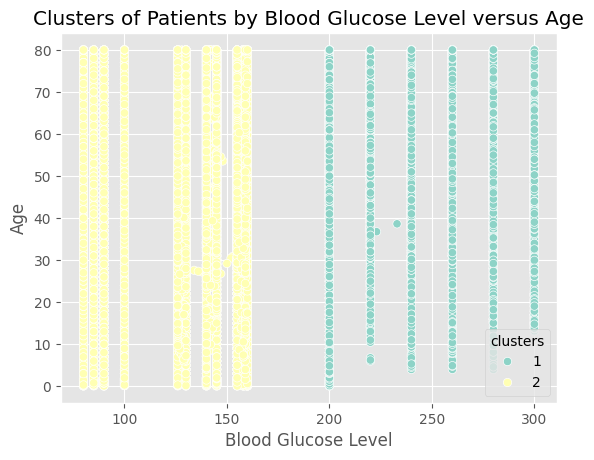

In [88]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled_imp, x='blood_glucose_level', y='age', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Blood Glucose Level versus Age')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Age')
plt.show()

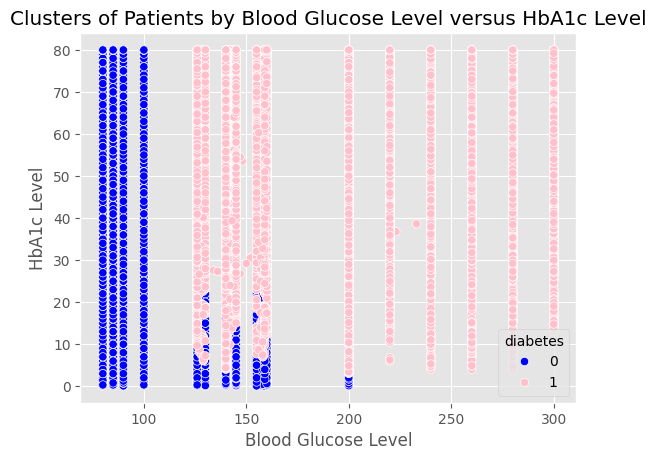

In [89]:
# Define custom colors for diabetes values
custom_palette = {0: 'blue', 1: 'pink'}

# Plot clusters using scatterplot with custom colors
sns.scatterplot(data=df_resampled_imp, x='blood_glucose_level', y='age', hue='diabetes', palette=custom_palette)
plt.title('Clusters of Patients by Blood Glucose Level versus HbA1c Level')
plt.xlabel('Blood Glucose Level')
plt.ylabel('HbA1c Level')
plt.show()



C:\Users\joyce\AppData\Local\Temp\ipykernel_14376\3301959830.py:5: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(data=df_resampled_imp, x='HbA1c_level', y='age', hue='clusters', palette=pal)


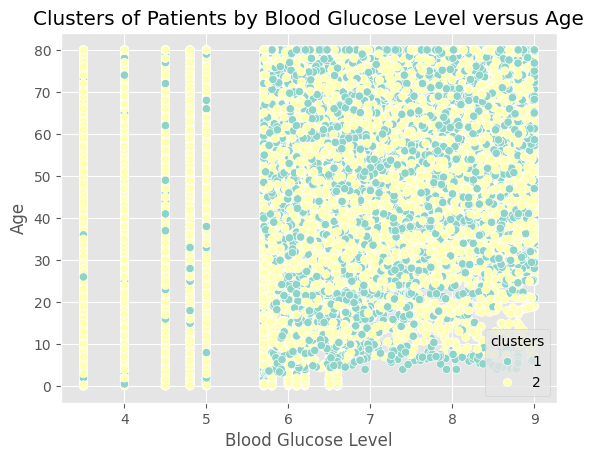

In [90]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled_imp, x='HbA1c_level', y='age', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Blood Glucose Level versus Age')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Age')
plt.show()

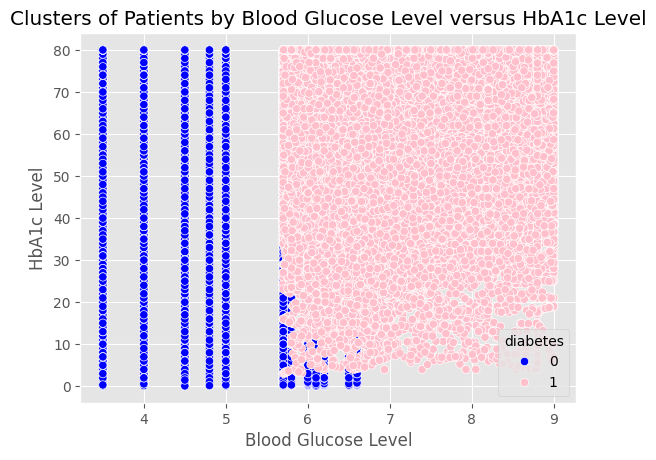

In [91]:
# Define custom colors for diabetes values
custom_palette = {0: 'blue', 1: 'pink'}

# Plot clusters using scatterplot with custom colors
sns.scatterplot(data=df_resampled_imp, x='HbA1c_level', y='age', hue='diabetes', palette=custom_palette)
plt.title('Clusters of Patients by Blood Glucose Level versus HbA1c Level')
plt.xlabel('Blood Glucose Level')
plt.ylabel('HbA1c Level')
plt.show()

<h1>Bisect K-Means Important Clustering <h1>

In [92]:
X_important_bisect = df_important_bisect.iloc[:, 0:4]
y_bisect = df_important_bisect.iloc[:, -1]


# Instantiate BisectingKMeans with desired number of clusters
bkm = BisectingKMeans(n_clusters=2, random_state=424)

# Fit the model to the data
bkm.fit(X_important_bisect)



# Predict the clusters for the data points
labels = bkm.predict(X_important_bisect) + 1

# Print the cluster centers
print("Cluster centers:")
print(bkm.cluster_centers_)

X_important_bisect['clusters']=labels
X_important_bisect

Cluster centers:
[[ 58.30582433  31.21402812   6.67619057 244.13351765]
 [ 47.66722026  28.7793662    5.94923641 133.82109859]]


age        bmi  HbA1c_level  blood_glucose_level  clusters
0       80.0  25.190000     6.600000                  140         2
1       54.0  27.320000     6.600000                   80         2
2       28.0  27.320000     5.700000                  158         2
3       36.0  23.450000     5.000000                  155         2
4       76.0  20.140000     4.800000                  155         2
...      ...        ...          ...                  ...       ...
182959  72.0  27.992175     6.760849                  160         2
182960  80.0  35.628573     6.100000                  260         1
182961  67.0  29.786139     6.134009                  159         2
182962  54.0  28.054402     5.800000                  145         2
182963  61.0  37.605755     8.527164                  200         1

[182964 rows x 5 columns]

In [93]:
# Assign the 'clusters' column to the original DataFrame
df_important_bisect['clusters'] = X_important_bisect['clusters']

# Display the DataFrame with added 'clusters' column
df_important_bisect

age        bmi  HbA1c_level  blood_glucose_level  diabetes  clusters  \
0       80.0  25.190000     6.600000                  140         0         2   
1       54.0  27.320000     6.600000                   80         0         2   
2       28.0  27.320000     5.700000                  158         0         2   
3       36.0  23.450000     5.000000                  155         0         2   
4       76.0  20.140000     4.800000                  155         0         2   
...      ...        ...          ...                  ...       ...       ...   
182959  72.0  27.992175     6.760849                  160         1         2   
182960  80.0  35.628573     6.100000                  260         1         1   
182961  67.0  29.786139     6.134009                  159         1         2   
182962  54.0  28.054402     5.800000                  145         1         2   
182963  61.0  37.605755     8.527164                  200         1         1   

         bmi/age  
0       0.314875  
1       0.505926  
2       0.975714  
3       0.651389  
4       0.265000  
...          ...  
182959  0.388780  
182960  0.445357  
182961  0.444569  
182962  0.519526  
182963  0.616488  

[182964 rows x 7 columns]

<h1> Logistic Prediction on important bisect Cluster groups <h1>

In [94]:
# Iterate over unique cluster values
for cluster_value in df_important_bisect['clusters'].unique():
    # Create a DataFrame for the current cluster
    cluster_idx_important_bisect = df_important_bisect[df_important_bisect['clusters'] == cluster_value].copy()
    
    # Create a variable for the current DataFrame
    globals()[f'cluster_{cluster_value}_important_bisect'] = cluster_idx_important_bisect

In [95]:
cluster_1_important_bisect

age        bmi  HbA1c_level  blood_glucose_level  diabetes  \
6       44.00000  19.310000     6.500000                  200         1   
13      67.00000  25.690000     5.800000                  200         0   
16      15.00000  30.360000     6.100000                  200         0   
26      67.00000  27.320000     6.500000                  200         1   
30      53.00000  31.750000     4.000000                  200         0   
...          ...        ...          ...                  ...       ...   
182951  52.09989  36.171932     7.119867                  220         1   
182955  65.08052  44.669844     6.877403                  200         1   
182958  80.00000  27.320000     9.000000                  240         1   
182960  80.00000  35.628573     6.100000                  260         1   
182963  61.00000  37.605755     8.527164                  200         1   

        clusters   bmi/age  
6              1  0.438864  
13             1  0.383433  
16             1  2.024000  
26             1  0.407761  
30             1  0.599057  
...          ...       ...  
182951         1  0.694280  
182955         1  0.686378  
182958         1  0.341500  
182960         1  0.445357  
182963         1  0.616488  

[49192 rows x 7 columns]

In [96]:
X_2_important_bisect = cluster_2_important_bisect.drop('diabetes', axis=1)  # Features
X_2_important_bisect = X_2_important_bisect.drop('clusters', axis = 1)
y_2_important_bisect = cluster_2_important_bisect['diabetes']  # Target variable


# Split the data into training and test sets
X_train_2_important_bisect, X_test_2_important_bisect, y_train_2_important_bisect, y_test_2_important_bisect = train_test_split(X_2_important_bisect, y_2_important_bisect, test_size=0.3, random_state=424)

# Initialize the logistic regression model
logreg_2_important_bisect = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_2_important_bisect.fit(X_train_2_important_bisect, y_train_2_important_bisect)

# Make predictions on the test data
predictions_2_important_bisect = logreg_2_important_bisect.predict(X_test_2_important_bisect)

# Evaluate the model
accuracy = accuracy_score(y_test_2_important_bisect, predictions_2_important_bisect)
classification_rep = classification_report(y_test_2_important_bisect, predictions_2_important_bisect)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8643725705172929
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     25381
           1       0.82      0.82      0.82     14751

    accuracy                           0.86     40132
   macro avg       0.85      0.85      0.85     40132
weighted avg       0.86      0.86      0.86     40132



In [97]:
X_1_important_bisect = cluster_1_important_bisect.drop('diabetes', axis=1)  # Features
X_1_important_bisect = X_1_important_bisect.drop('clusters', axis = 1)
y_1_important_bisect = cluster_1_important_bisect['diabetes']  # Target variable


# Split the data into training and test sets
X_train_1_important_bisect, X_test_1_important_bisect, y_train_1_important_bisect, y_test_1_important_bisect = train_test_split(X_1_important_bisect, y_1_important_bisect, test_size=0.3, random_state=424)

# Initialize the logistic regression model
logreg_1_important_bisect = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_1_important_bisect.fit(X_train_1_important_bisect, y_train_1_important_bisect)

# Make predictions on the test data
predictions_1_important_bisect = logreg_1_important_bisect.predict(X_test_1_important_bisect)

# Evaluate the model
accuracy = accuracy_score(y_test_1_important_bisect, predictions_1_important_bisect)
classification_rep = classification_report(y_test_1_important_bisect, predictions_1_important_bisect)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9571080092153408
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2036
           1       0.97      0.98      0.98     12722

    accuracy                           0.96     14758
   macro avg       0.92      0.90      0.91     14758
weighted avg       0.96      0.96      0.96     14758



c:\Users\joyce\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [98]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Combine features and labels from all clusters
X_important_bisect_combined = np.concatenate((X_2_important_bisect, X_1_important_bisect), axis=0)
y_important_bisect_combined = np.concatenate((y_2_important_bisect, y_1_important_bisect), axis=0)

# Split the bisect_combined data into training and test sets
X_train_important_bisect_combined, X_test_important_bisect_combined, y_train_important_bisect_combined, y_test_important_bisect_combined = train_test_split(X_important_bisect_combined, y_important_bisect_combined, test_size=0.3, random_state=424)

# Create a list of tuples where each tuple is (model_name, model_instance)
model_tuple_list = [ ('cluster_2_important_bisect', logreg_2_important_bisect), ('cluster_1_important_bisect', logreg_1_important_bisect)]

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=model_tuple_list, voting='hard')

# Fit the VotingClassifier on the bisect_combined training set
voting_clf.fit(X_train_important_bisect_combined, y_train_important_bisect_combined)

# Make predictions using the ensemble model on the bisect_combined test set
ensemble_predictions_important_bisect = voting_clf.predict(X_test_important_bisect_combined)

# Evaluate the ensemble model
accuracy_ensemble_important_bisect = accuracy_score(y_test_important_bisect_combined, ensemble_predictions_important_bisect)

# Calculate precision
precision_ensemble_important_bisect = precision_score(y_test_important_bisect_combined, ensemble_predictions_important_bisect, average='weighted')

# Calculate recall
recall_ensemble_important_bisect = recall_score(y_test_important_bisect_combined, ensemble_predictions_important_bisect, average='weighted')

# Calculate F1-score
f1_ensemble_important_bisect = f1_score(y_test_important_bisect_combined, ensemble_predictions_important_bisect, average='weighted')

classification_report_ensemble_important_bisect = classification_report(y_test_important_bisect_combined, ensemble_predictions_important_bisect)

print(f"Ensemble Bisect Model Accuracy: {accuracy_ensemble_important_bisect}")
print(f"Ensemble Bisect Model Precision: {precision_ensemble_important_bisect}")
print(f"Ensemble Bisect Model Recall: {recall_ensemble_important_bisect}")
print(f"Ensemble Bisect Model F1-score: {f1_ensemble_important_bisect}")


print("Ensemble Bisect Model Classification Report:")
print(classification_report_ensemble_important_bisect)

Ensemble Bisect Model Accuracy: 0.8841319001639643
Ensemble Bisect Model Precision: 0.8841360612947029
Ensemble Bisect Model Recall: 0.8841319001639643
Ensemble Bisect Model F1-score: 0.8841324594927502
Ensemble Bisect Model Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88     27582
           1       0.88      0.88      0.88     27308

    accuracy                           0.88     54890
   macro avg       0.88      0.88      0.88     54890
weighted avg       0.88      0.88      0.88     54890



In [99]:
from sklearn.metrics import roc_auc_score
# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=model_tuple_list, voting='soft')

# Fit the VotingClassifier on the bisect_combined training set
voting_clf.fit(X_train_important_bisect_combined, y_train_important_bisect_combined)


# Calculate predicted probabilities for each class
ensemble_probabilities = voting_clf.predict_proba(X_test_important_bisect_combined)

# Extract the predicted probabilities for the positive class (class 1)
positive_class_probabilities = ensemble_probabilities[:, 1]

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test_important_bisect_combined, positive_class_probabilities)

print(f"AUC-ROC Score: {auc_roc}")




AUC-ROC Score: 0.961674495805718


C:\Users\joyce\AppData\Local\Temp\ipykernel_14376\3913402070.py:5: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(data=df_important_bisect, x='age', y='bmi', hue='clusters', palette=pal)


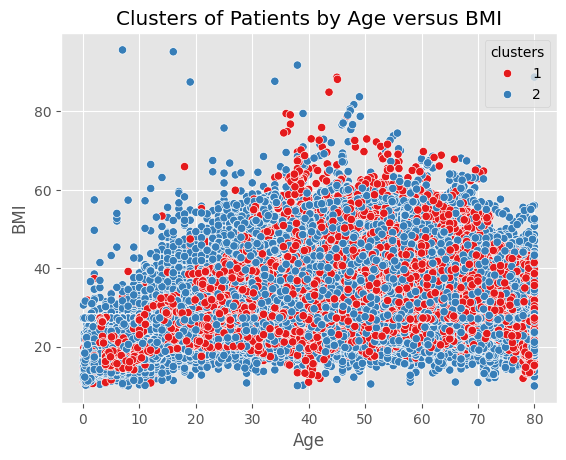

In [100]:
#pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set1', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_important_bisect, x='age', y='bmi', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Age versus BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

C:\Users\joyce\AppData\Local\Temp\ipykernel_14376\3973606568.py:5: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(data=df_important_bisect, x='blood_glucose_level', y='HbA1c_level', hue='clusters', palette=pal)


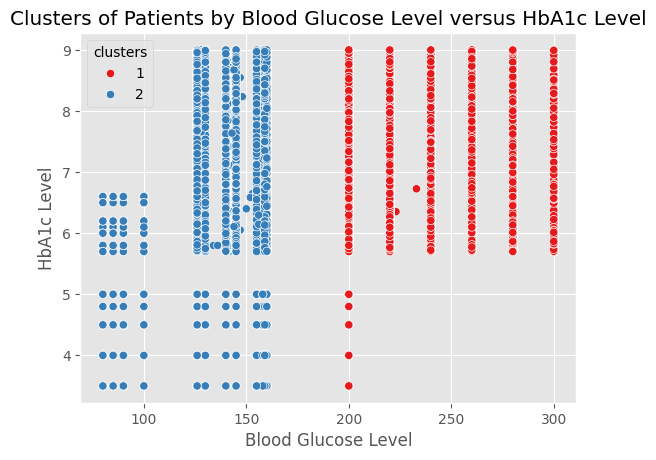

In [101]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set1', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_important_bisect, x='blood_glucose_level', y='HbA1c_level', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Blood Glucose Level versus HbA1c Level')
plt.xlabel('Blood Glucose Level')
plt.ylabel('HbA1c Level')
plt.show()



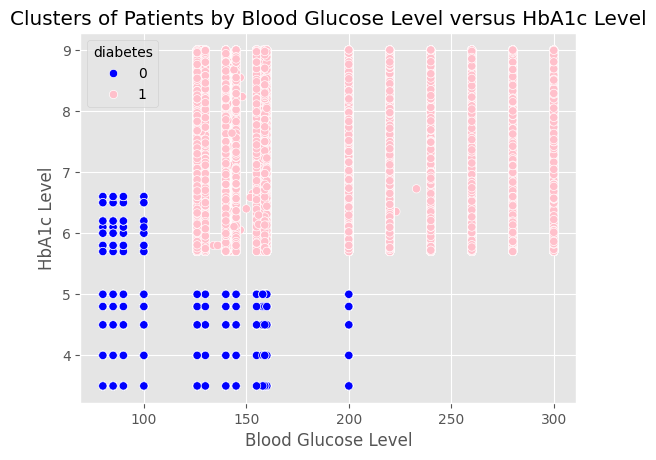

In [102]:
# Define custom colors for diabetes values
custom_palette = {0: 'blue', 1: 'pink'}

# Plot clusters using scatterplot with custom colors
sns.scatterplot(data=df_important_bisect, x='blood_glucose_level', y='HbA1c_level', hue='diabetes', palette=custom_palette)
plt.title('Clusters of Patients by Blood Glucose Level versus HbA1c Level')
plt.xlabel('Blood Glucose Level')
plt.ylabel('HbA1c Level')
plt.show()



C:\Users\joyce\AppData\Local\Temp\ipykernel_14376\1050172262.py:5: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(data=df_important_bisect, x='blood_glucose_level', y='age', hue='clusters', palette=pal)


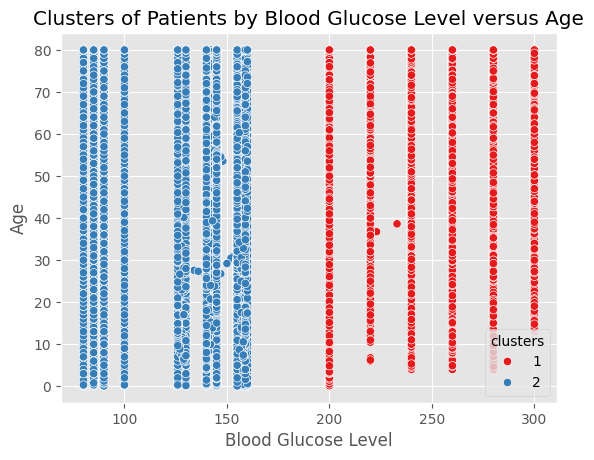

In [103]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set1', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_important_bisect, x='blood_glucose_level', y='age', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Blood Glucose Level versus Age')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Age')
plt.show()

C:\Users\joyce\AppData\Local\Temp\ipykernel_14376\1820993515.py:5: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(data=df_important_bisect, x='blood_glucose_level', y='bmi', hue='clusters', palette=pal)


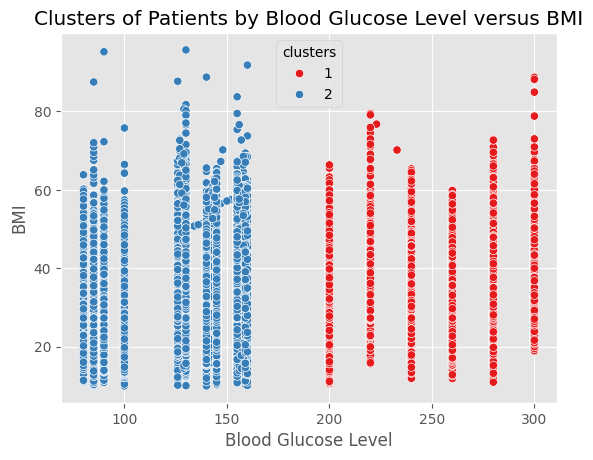

In [104]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set1', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_important_bisect, x='blood_glucose_level', y='bmi', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Blood Glucose Level versus BMI')
plt.xlabel('Blood Glucose Level')
plt.ylabel('BMI')
plt.show()

C:\Users\joyce\AppData\Local\Temp\ipykernel_14376\2197245184.py:5: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(data=df_important_bisect, x='HbA1c_level', y='age', hue='clusters', palette=pal)


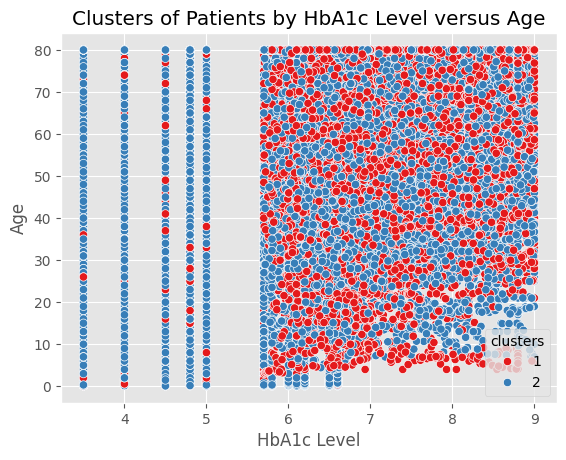

In [105]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set1', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_important_bisect, x='HbA1c_level', y='age', hue='clusters', palette=pal)
plt.title('Clusters of Patients by HbA1c Level versus Age')
plt.xlabel('HbA1c Level')
plt.ylabel('Age')
plt.show()

C:\Users\joyce\AppData\Local\Temp\ipykernel_14376\1219482323.py:5: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(data=df_important_bisect, x='HbA1c_level', y='bmi', hue='clusters', palette=pal)


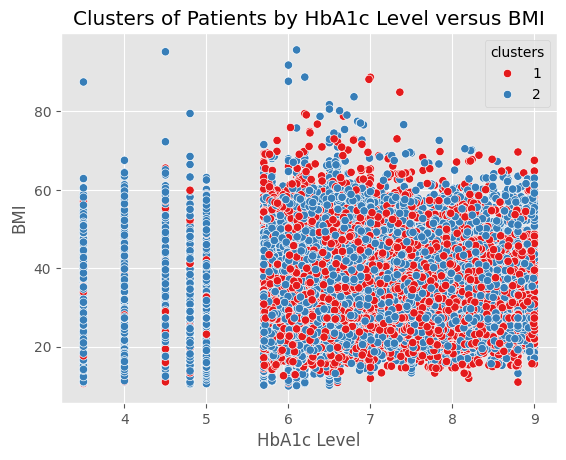

In [106]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set1', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_important_bisect, x='HbA1c_level', y='bmi', hue='clusters', palette=pal)
plt.title('Clusters of Patients by HbA1c Level versus BMI')
plt.xlabel('HbA1c Level')
plt.ylabel('BMI')
plt.show()